In [1]:
import os
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
# 한글폰트 깨짐 방지
# 이 부분은 실행 툴 따라서 변경해주세요! 현재 주피터 기준입니다
# 윈도우에서는 'Malgun Gothic', 맥에서는 'AppleGothic'
import matplotlib as mlp

mlp.rcParams['font.family'] ='Malgun Gothic'
mlp.rcParams['axes.unicode_minus'] =False

# 1. 파일 Import

In [3]:
df_1=pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2021년도(상).csv")
df_2=pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2021년도(하).csv")

df_3=pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2022년도(상).csv")
df_4=pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2022년도(하).csv")

df_5 = pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2023년도(상).csv", encoding='cp949')
df_6 = pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2023년도(하).csv", encoding='cp949')


In [4]:
# 모든 데이터프레임을 리스트에 담기
dataframes = [df_1, df_2, df_3, df_4, df_5, df_6]

# 데이터프레임 병합
data = pd.concat(dataframes, axis=0, ignore_index=True)

# 원본 데이터 확인
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746065 entries, 0 to 4746064
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   접수일시    object 
 1   예정일시    object 
 2   배차일시    object 
 3   승차일시    object 
 4   하차일시    object 
 5   취소일시    object 
 6   출발지구    object 
 7   출발지동    object 
 8   목적지구    object 
 9   목적지동    object 
 10  이용목적    object 
 11  요금      object 
 12  승차거리    float64
 13  차량구분    object 
 14  유형      object 
dtypes: float64(1), object(14)
memory usage: 543.1+ MB


# 2. 취소일시, 이용목적, 차량구분 삭제

In [5]:
# 취소일시, 이용목적, 차량구분 열 제거
data.drop(columns=['취소일시','이용목적','차량구분'], inplace=True)

# 삭제 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746065 entries, 0 to 4746064
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   접수일시    object 
 1   예정일시    object 
 2   배차일시    object 
 3   승차일시    object 
 4   하차일시    object 
 5   출발지구    object 
 6   출발지동    object 
 7   목적지구    object 
 8   목적지동    object 
 9   요금      object 
 10  승차거리    float64
 11  유형      object 
dtypes: float64(1), object(11)
memory usage: 434.5+ MB


# 3. 결측치 삭제 및 시각화

In [6]:
# 결측치 확인
print("각 열의 결측값 개수:")
print(data.isnull().sum())

각 열의 결측값 개수:
접수일시          0
예정일시          0
배차일시     521226
승차일시     740597
하차일시     739361
출발지구        105
출발지동        105
목적지구        141
목적지동        141
요금            0
승차거리     434013
유형      2973701
dtype: int64


<AxesSubplot:>

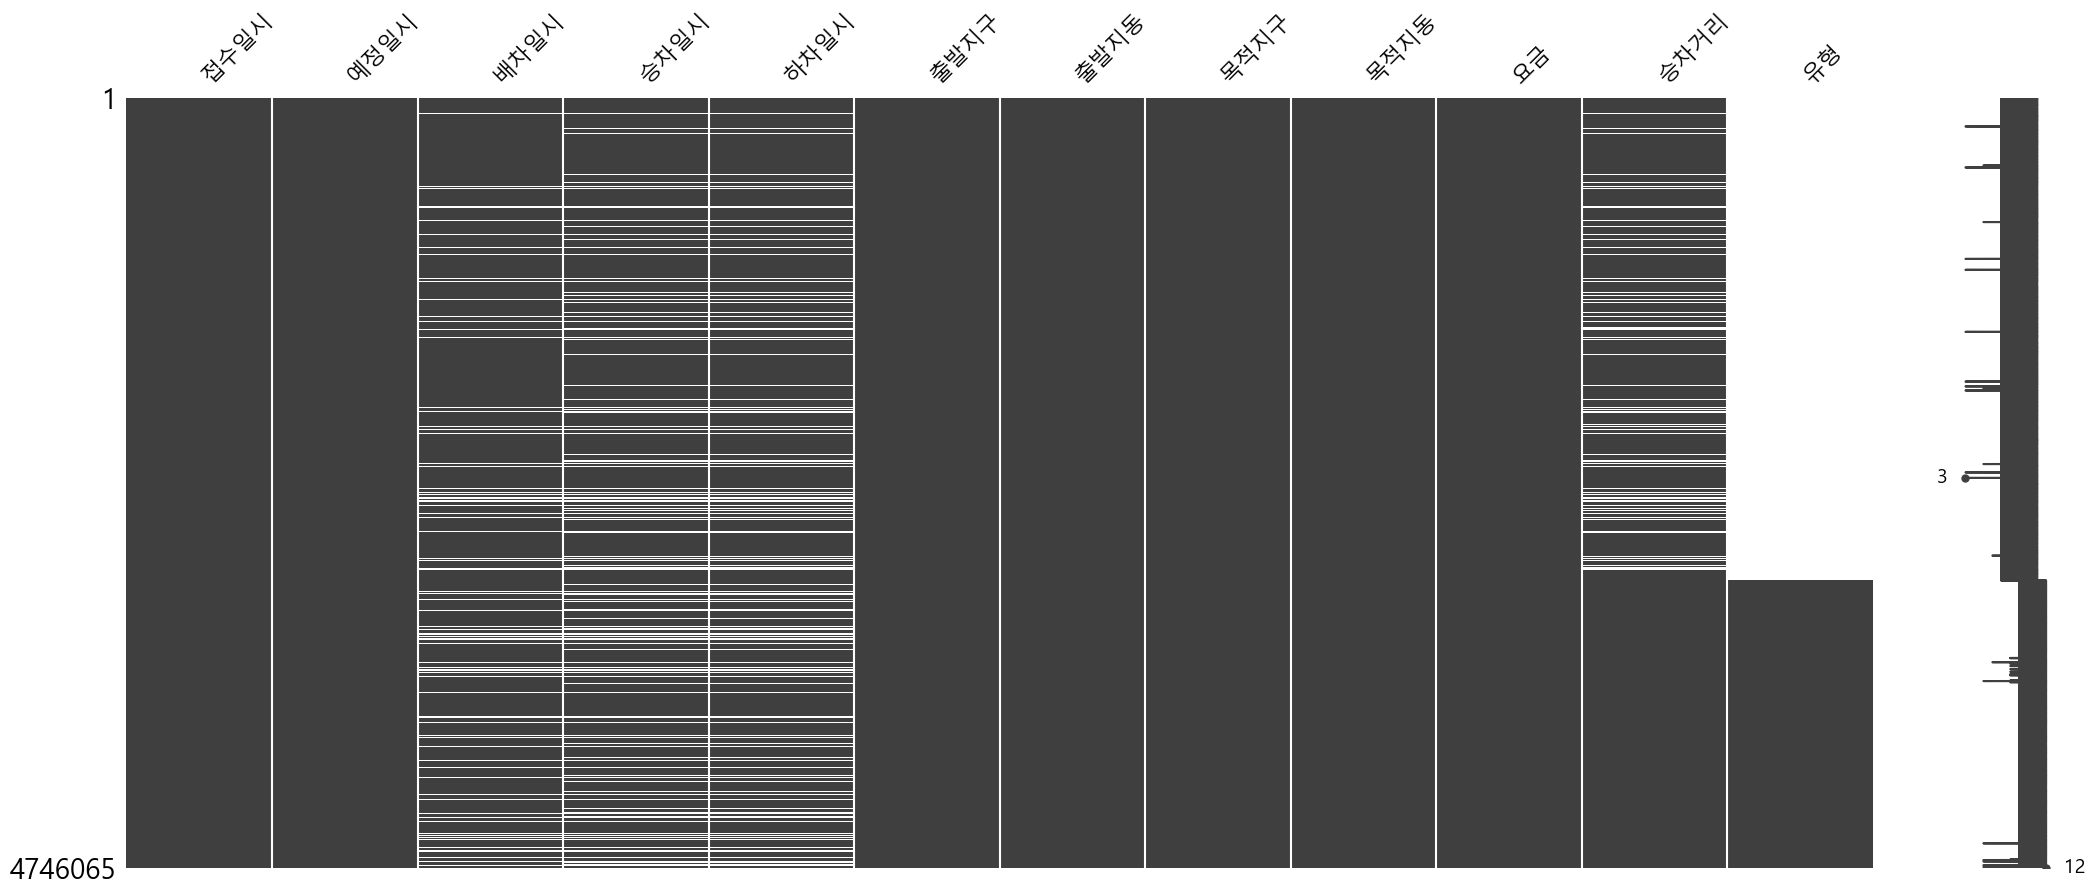

In [7]:
import missingno

# 결측치 시각화
missingno.matrix(data)

In [8]:
# 결측치가 포함된 모든 행 제거
data = data.dropna()

# 결측치 제거 후 확인
print("결측치 제거 후 각 열의 결측치 확인:")
print(data.isnull().sum())

결측치 제거 후 각 열의 결측치 확인:
접수일시    0
예정일시    0
배차일시    0
승차일시    0
하차일시    0
출발지구    0
출발지동    0
목적지구    0
목적지동    0
요금      0
승차거리    0
유형      0
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454335 entries, 2973701 to 4746064
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   접수일시    1454335 non-null  object 
 1   예정일시    1454335 non-null  object 
 2   배차일시    1454335 non-null  object 
 3   승차일시    1454335 non-null  object 
 4   하차일시    1454335 non-null  object 
 5   출발지구    1454335 non-null  object 
 6   출발지동    1454335 non-null  object 
 7   목적지구    1454335 non-null  object 
 8   목적지동    1454335 non-null  object 
 9   요금      1454335 non-null  object 
 10  승차거리    1454335 non-null  float64
 11  유형      1454335 non-null  object 
dtypes: float64(1), object(11)
memory usage: 144.2+ MB


# 4. 접수일시, 예정일시, 배차일시와 승차일시 상관관계
- 각자 해보시고 '5.대기시간' 계산식 수정해주시면 됩니다!

In [11]:
# '승차일시'와 각각 '접수일시', '예정일시', '배차일시' 간의 상관관계 계산

# NaT 값을 제거하여 각 열의 상관관계 계산을 위한 클린 데이터셋 생성
filtered_data = data[['승차일시', '접수일시', '예정일시', '배차일시']].dropna()


# 날짜 열을 datetime 형식으로 변환
filtered_data['승차일시'] = pd.to_datetime(filtered_data['승차일시'], errors='coerce')
filtered_data['접수일시'] = pd.to_datetime(filtered_data['접수일시'], errors='coerce')
filtered_data['예정일시'] = pd.to_datetime(filtered_data['예정일시'], errors='coerce')
filtered_data['배차일시'] = pd.to_datetime(filtered_data['배차일시'], errors='coerce')

print(filtered_data[['승차일시', '접수일시', '예정일시','배차일시']].dtypes)

승차일시    datetime64[ns]
접수일시    datetime64[ns]
예정일시    datetime64[ns]
배차일시    datetime64[ns]
dtype: object


In [12]:
# NaT 값을 제거하여 각 열의 상관관계 계산을 위한 클린 데이터셋 생성
filtered_data = data[['승차일시', '접수일시', '예정일시', '배차일시']].dropna()
print(filtered_data)

                        승차일시                 접수일시                 예정일시  \
2973701  2023-01-01 01:19:18  2022-12-31 23:59:50  2023-01-01 00:00:00   
2973702  2023-01-01 00:44:51  2023-01-01 00:00:35  2023-01-01 00:00:35   
2973703  2023-01-01 01:39:29  2023-01-01 00:01:39  2023-01-01 00:01:39   
2973704  2023-01-01 01:12:38  2023-01-01 00:02:12  2023-01-01 00:02:12   
2973706  2023-01-01 01:02:38  2023-01-01 00:04:43  2023-01-01 00:04:43   
...                      ...                  ...                  ...   
4746059  2024-01-01 01:24:48  2023-12-31 23:57:23  2023-12-31 23:57:00   
4746060  2024-01-01 01:37:11  2023-12-31 23:56:14  2023-12-31 23:57:00   
4746061  2024-01-01 01:45:06  2023-12-31 23:57:28  2023-12-31 23:58:00   
4746062  2024-01-01 01:31:02  2023-12-31 23:57:17  2023-12-31 23:58:00   
4746064  2024-01-01 02:05:18  2023-12-31 23:58:46  2023-12-31 23:58:46   

                        배차일시  
2973701  2023-01-01 00:53:06  
2973702  2023-01-01 00:34:18  
2973703  2023-01-0

In [13]:
# 각 열을 datetime 형식으로 변환하고 문자열이 남아있다면 NaT로 처리
filtered_data['승차일시'] = pd.to_datetime(filtered_data['승차일시'], errors='coerce')
filtered_data['접수일시'] = pd.to_datetime(filtered_data['접수일시'], errors='coerce')
filtered_data['예정일시'] = pd.to_datetime(filtered_data['예정일시'], errors='coerce')
filtered_data['배차일시'] = pd.to_datetime(filtered_data['배차일시'], errors='coerce')

# 날짜 데이터를 ordinal 형식으로 변환
filtered_data['승차일시_ordinal'] = filtered_data['승차일시'].apply(lambda x: x.toordinal() if pd.notnull(x) else None)
filtered_data['접수일시_ordinal'] = filtered_data['접수일시'].apply(lambda x: x.toordinal() if pd.notnull(x) else None)
filtered_data['예정일시_ordinal'] = filtered_data['예정일시'].apply(lambda x: x.toordinal() if pd.notnull(x) else None)
filtered_data['배차일시_ordinal'] = filtered_data['배차일시'].apply(lambda x: x.toordinal() if pd.notnull(x) else None)

# 상관관계 계산을 위해 ordinal 열만 선택
승차_상관관계 = filtered_data[['승차일시_ordinal', '접수일시_ordinal', '예정일시_ordinal', '배차일시_ordinal']].corr()

# '승차일시_ordinal'과 다른 열들과의 상관관계만 선택하여 시리즈 형태로 저장
승차_상관관계_series = 승차_상관관계['승차일시_ordinal'][['접수일시_ordinal', '예정일시_ordinal', '배차일시_ordinal']]
승차_상관관계_series


접수일시_ordinal    0.999998
예정일시_ordinal    1.000000
배차일시_ordinal    1.000000
Name: 승차일시_ordinal, dtype: float64

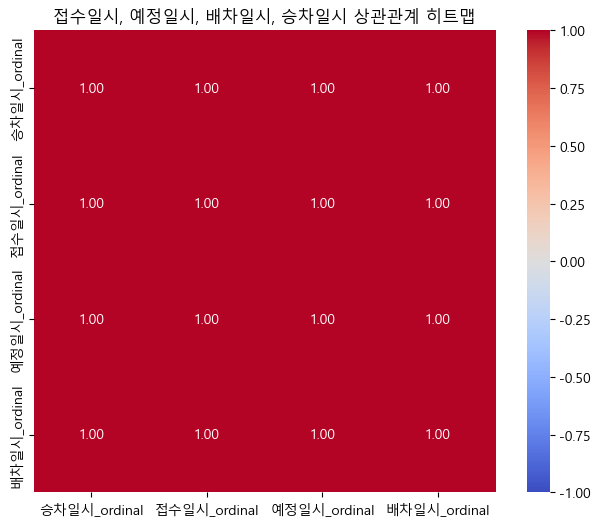

In [14]:
# 승차일시, 접수일시, 예정일시, 배차일시 전체 상관관계 행렬을 시각화하기 위한 히트맵

# 히트맵 설정
plt.figure(figsize=(8, 6))
sns.heatmap(승차_상관관계, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", square=True)

# 그래프 제목 추가
plt.title("접수일시, 예정일시, 배차일시, 승차일시 상관관계 히트맵")

# 그래프 출력
plt.show()


# 5. '대기시간' 컬럼 추가
- 컬럼명: '대기시간'
- 단위: 분

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454335 entries, 2973701 to 4746064
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   접수일시    1454335 non-null  object 
 1   예정일시    1454335 non-null  object 
 2   배차일시    1454335 non-null  object 
 3   승차일시    1454335 non-null  object 
 4   하차일시    1454335 non-null  object 
 5   출발지구    1454335 non-null  object 
 6   출발지동    1454335 non-null  object 
 7   목적지구    1454335 non-null  object 
 8   목적지동    1454335 non-null  object 
 9   요금      1454335 non-null  object 
 10  승차거리    1454335 non-null  float64
 11  유형      1454335 non-null  object 
dtypes: float64(1), object(11)
memory usage: 144.2+ MB


In [16]:
# '접수일시'와 '승차일시' 열을 기준으로 대기시간 생성
data['접수일시'] = pd.to_datetime(data['접수일시'], errors='coerce')
data['승차일시'] = pd.to_datetime(data['승차일시'], errors='coerce')

# '접수일시'와 '승차일시' 간의 차이를 계산하여 '대기시간_분' 열에 분 단위로 추가
data['대기시간'] = (data['승차일시'] - data['접수일시']).dt.total_seconds() / 60

In [17]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454335 entries, 2973701 to 4746064
Data columns (total 13 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   접수일시    1454335 non-null  datetime64[ns]
 1   예정일시    1454335 non-null  object        
 2   배차일시    1454335 non-null  object        
 3   승차일시    1454335 non-null  datetime64[ns]
 4   하차일시    1454335 non-null  object        
 5   출발지구    1454335 non-null  object        
 6   출발지동    1454335 non-null  object        
 7   목적지구    1454335 non-null  object        
 8   목적지동    1454335 non-null  object        
 9   요금      1454335 non-null  object        
 10  승차거리    1454335 non-null  float64       
 11  유형      1454335 non-null  object        
 12  대기시간    1454335 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 155.3+ MB


# 6. '공휴일' 컬럼 추가
- 컬럼명: '공휴일'
- 값: 공휴일 = 1, 공휴일이 아니면 = 0

In [18]:
from workalendar.asia import SouthKorea

# 2019년부터 2023년까지 공휴일 데이터를 가져오기

years = list(range(2019, 2024))  

# SouthKorea 클래스 인스턴스 생성
cal = SouthKorea()

all_holidays = []

# 각 연도의 공휴일 정보 가져오기
for year in years:
    holiday_list = cal.holidays(year)
    all_holidays.extend(holiday_list)

# 공휴일 정보를 DataFrame으로 변환
holiday_df = pd.DataFrame(all_holidays, columns=['날짜', '공휴일'])

holiday_df

,날짜,공휴일
0,2019-01-01,New year
1,2019-02-04,Korean New Year's Day
2,2019-02-05,Korean New Year's Day
3,2019-02-06,Korean New Year's Day
4,2019-03-01,Independence Day
...,...,...
70,2023-09-29,Midautumn Festival
71,2023-09-30,Midautumn Festival
72,2023-10-03,National Foundation Day
73,2023-10-09,Hangul Day


In [19]:
# '날짜' 열을 datetime 형식으로 변환
holiday_df['날짜'] = pd.to_datetime(holiday_df['날짜']).dt.date

# '접수일시'를 기준으로 '공휴일여부' 컬럼 추가, 기존 '접수일시' 값은 변하지 않음
data['공휴일'] = data['접수일시'].dt.date.apply(lambda x: 1 if x in holiday_df['날짜'].values else 0)

# 결과 확인
data.head()

,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,유형,대기시간,공휴일
2973701,2022-12-31 23:59:50,2023-01-01 00:00:00,2023-01-01 00:53:06,2023-01-01 01:19:18,2023-01-01 01:31:46,도봉구,도봉제2동,노원구,상계2동,1500,3990.0,뇌병,79.466667,0
2973702,2023-01-01 00:00:35,2023-01-01 00:00:35,2023-01-01 00:34:18,2023-01-01 00:44:51,2023-01-01 00:53:37,양천구,신정4동,강서구,화곡제4동,1500,3206.0,뇌병,44.266667,1
2973703,2023-01-01 00:01:39,2023-01-01 00:01:39,2023-01-01 01:02:43,2023-01-01 01:39:29,2023-01-01 02:13:15,은평구,응암제2동,관악구,미성동,3500,18860.0,뇌병,97.833333,1
2973704,2023-01-01 00:02:12,2023-01-01 00:02:12,2023-01-01 00:46:13,2023-01-01 01:12:38,2023-01-01 01:23:29,중랑구,중화제1동,중랑구,신내2동,1500,2132.0,지체,70.433333,1
2973706,2023-01-01 00:04:43,2023-01-01 00:04:43,2023-01-01 00:52:28,2023-01-01 01:02:38,2023-01-01 01:18:38,강동구,상일동,강동구,성내제2동,1500,4830.0,지체,57.916667,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454335 entries, 2973701 to 4746064
Data columns (total 14 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   접수일시    1454335 non-null  datetime64[ns]
 1   예정일시    1454335 non-null  object        
 2   배차일시    1454335 non-null  object        
 3   승차일시    1454335 non-null  datetime64[ns]
 4   하차일시    1454335 non-null  object        
 5   출발지구    1454335 non-null  object        
 6   출발지동    1454335 non-null  object        
 7   목적지구    1454335 non-null  object        
 8   목적지동    1454335 non-null  object        
 9   요금      1454335 non-null  object        
 10  승차거리    1454335 non-null  float64       
 11  유형      1454335 non-null  object        
 12  대기시간    1454335 non-null  float64       
 13  공휴일     1454335 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(9)
memory usage: 166.4+ MB


# 7. 서울-서울 필터링

In [21]:
# 출발지구 열의 고유 값 확인
departure_zones = data['출발지구'].unique()
print("출발지구에 포함된 값들:")
print(departure_zones)

# 목적지구 열의 고유 값 확인
destination_zones = data['목적지구'].unique()
print("\n목적지구에 포함된 값들:")
print(destination_zones)

출발지구에 포함된 값들:
['도봉구' '양천구' '은평구' '중랑구' '강동구' '광진구' '영등포구' '송파구' '동대문구' '강서구' '성북구' '마포구'
 '서대문구' '종로구' '동작구' '강북구' '노원구' '금천구' '강남구' '용산구' '구로구' '성동구' '관악구' '서초구'
 '중구' '남양주시' '양주시' '고양시덕양구' '고양시일산동구' '의정부시' '하남시' '과천시' '고양시일산서구'
 '부천시원미구' '부천시오정구' '광명시' '성남시중원구' '성남시분당구' '구리시' '김포시' '부평구' '성남시수정구'
 '안양시만안구' '안양시동안구' '수원시영통구' '부천시소사구' '연수구' '양평군' '수원시팔달구' '포천시' '용인시수지구'
 '안산시상록구' '남동구' '안성시' '동두천시']

목적지구에 포함된 값들:
['노원구' '강서구' '관악구' '중랑구' '강동구' '남양주시' '성남시수정구' '동대문구' '은평구' '서대문구' '종로구'
 '마포구' '동작구' '강남구' '도봉구' '구로구' '성북구' '강북구' '성남시중원구' '영등포구' '양주시' '용산구'
 '김포시' '송파구' '서초구' '성동구' '중구' '광진구' '의정부시' '고양시덕양구' '양천구' '금천구' '부천시원미구'
 '구리시' '광명시' '성남시분당구' '하남시' '부천시소사구' '안양시만안구' '부평구' '고양시일산동구' '부천시오정구'
 '고양시일산서구' '과천시' '안양시동안구' '남구' '파주시' '서구' '계양구' '수원시팔달구' '용인시수지구' '광주시'
 '수원시장안구' '수원시영통구' '안산시단원구' '용인시기흥구' '연수구' '양평군' '남동구' '군포시' '시흥시' '화성시'
 '수원시권선구' '포천시' '의왕시' '평택시' '안산시상록구' '여주군' '안성시' '동두천시' '동구' '용인시처인구'
 '가평군']


In [22]:
# 남기고 싶은 구 리스트 정의
seoul_regions = [
    "강서구", "강남구", "동작구", "영등포구", "은평구", "도봉구", "강북구", "관악구",
    "노원구", "금천구", "중랑구", "광진구", "서대문구", "송파구", "성동구",
    "성북구", "마포구", "양천구", "강동구", "용산구", "중구", "종로구",
    "동대문구", "서초구", "구로구"
]

# 출발지구와 목적지구가 모두 valid_zones에 포함된 행만 남기기
data = data[(data['출발지구'].isin(seoul_regions)) & (data['목적지구'].isin(seoul_regions))]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352595 entries, 2973701 to 4746064
Data columns (total 14 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   접수일시    1352595 non-null  datetime64[ns]
 1   예정일시    1352595 non-null  object        
 2   배차일시    1352595 non-null  object        
 3   승차일시    1352595 non-null  datetime64[ns]
 4   하차일시    1352595 non-null  object        
 5   출발지구    1352595 non-null  object        
 6   출발지동    1352595 non-null  object        
 7   목적지구    1352595 non-null  object        
 8   목적지동    1352595 non-null  object        
 9   요금      1352595 non-null  object        
 10  승차거리    1352595 non-null  float64       
 11  유형      1352595 non-null  object        
 12  대기시간    1352595 non-null  float64       
 13  공휴일     1352595 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(9)
memory usage: 154.8+ MB


In [23]:
data

,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,유형,대기시간,공휴일
2973701,2022-12-31 23:59:50,2023-01-01 00:00:00,2023-01-01 00:53:06,2023-01-01 01:19:18,2023-01-01 01:31:46,도봉구,도봉제2동,노원구,상계2동,1500,3990.0,뇌병,79.466667,0
2973702,2023-01-01 00:00:35,2023-01-01 00:00:35,2023-01-01 00:34:18,2023-01-01 00:44:51,2023-01-01 00:53:37,양천구,신정4동,강서구,화곡제4동,1500,3206.0,뇌병,44.266667,1
2973703,2023-01-01 00:01:39,2023-01-01 00:01:39,2023-01-01 01:02:43,2023-01-01 01:39:29,2023-01-01 02:13:15,은평구,응암제2동,관악구,미성동,3500,18860.0,뇌병,97.833333,1
2973704,2023-01-01 00:02:12,2023-01-01 00:02:12,2023-01-01 00:46:13,2023-01-01 01:12:38,2023-01-01 01:23:29,중랑구,중화제1동,중랑구,신내2동,1500,2132.0,지체,70.433333,1
2973706,2023-01-01 00:04:43,2023-01-01 00:04:43,2023-01-01 00:52:28,2023-01-01 01:02:38,2023-01-01 01:18:38,강동구,상일동,강동구,성내제2동,1500,4830.0,지체,57.916667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746059,2023-12-31 23:57:23,2023-12-31 23:57:00,2024-01-01 01:06:05,2024-01-01 01:24:48,2024-01-01 01:36:30,강북구,번제1동,노원구,월계2동,1500,3057.0,지체,87.416667,0
4746060,2023-12-31 23:56:14,2023-12-31 23:57:00,2024-01-01 01:16:08,2024-01-01 01:37:11,2024-01-01 02:07:51,관악구,청림동,강동구,고덕제1동,3800,23435.0,지체,100.950000,0
4746061,2023-12-31 23:57:28,2023-12-31 23:58:00,2024-01-01 01:18:35,2024-01-01 01:45:06,2024-01-01 01:58:42,영등포구,여의동,은평구,증산동,2900,9339.0,지체,107.633333,0
4746062,2023-12-31 23:57:17,2023-12-31 23:58:00,2024-01-01 01:11:39,2024-01-01 01:31:02,2024-01-01 01:47:56,영등포구,여의동,은평구,증산동,2900,9078.0,지체,93.750000,0


In [24]:
# 출발지구 열의 고유 값 확인
departure_zones = data['출발지구'].unique()
print("출발지구에 포함된 값들:")
print(departure_zones)

# 목적지구 열의 고유 값 확인
destination_zones = data['목적지구'].unique()
print("\n목적지구에 포함된 값들:")
print(destination_zones)

출발지구에 포함된 값들:
['도봉구' '양천구' '은평구' '중랑구' '강동구' '영등포구' '동대문구' '강서구' '광진구' '성북구' '마포구'
 '서대문구' '종로구' '동작구' '강북구' '송파구' '노원구' '금천구' '강남구' '용산구' '구로구' '성동구' '관악구'
 '서초구' '중구']

목적지구에 포함된 값들:
['노원구' '강서구' '관악구' '중랑구' '강동구' '동대문구' '은평구' '서대문구' '종로구' '마포구' '동작구' '강남구'
 '도봉구' '구로구' '성북구' '강북구' '영등포구' '용산구' '송파구' '서초구' '성동구' '중구' '광진구' '양천구'
 '금천구']


# 8. 이상치 처리

## 8.1 승차거리가 0인 행 제거

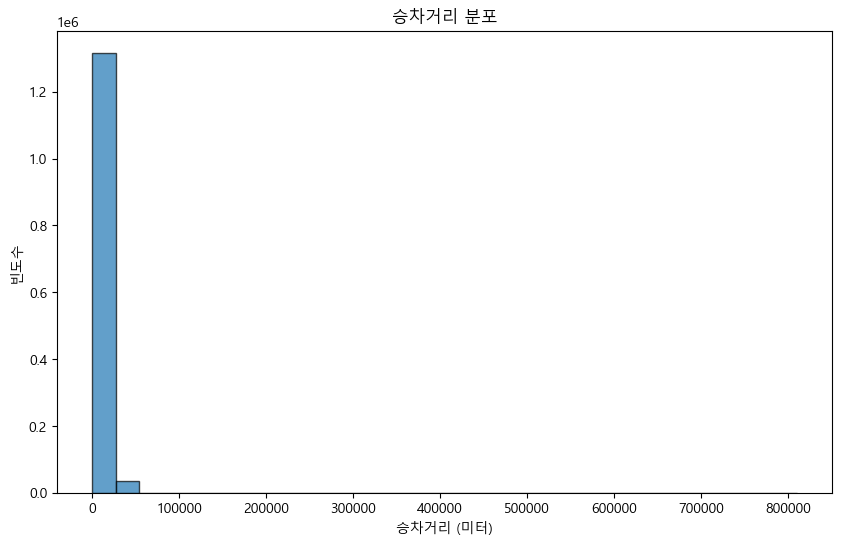

In [25]:
import matplotlib.pyplot as plt

# 승차거리 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['승차거리'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('승차거리 (미터)')
plt.ylabel('빈도수')
plt.title('승차거리 분포')
plt.show()

In [26]:
# 승차거리가 0인 데이터 개수 확인
zero_ride_time_count = data[data['승차거리'] == 0].shape[0]

# 승차거리가 0인 데이터가 0보다 많으면 해당 행 삭제
if zero_ride_time_count > 0:
    data = data[data['승차거리'] != 0]
    print(f"승차거리가 0인 {zero_ride_time_count}개의 행이 삭제되었습니다.")
else:
    print("승차거리가 0인 데이터가 없습니다.")

# 결과 확인
data.head()

승차거리가 0인 5175개의 행이 삭제되었습니다.


,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,유형,대기시간,공휴일
2973701,2022-12-31 23:59:50,2023-01-01 00:00:00,2023-01-01 00:53:06,2023-01-01 01:19:18,2023-01-01 01:31:46,도봉구,도봉제2동,노원구,상계2동,1500,3990.0,뇌병,79.466667,0
2973702,2023-01-01 00:00:35,2023-01-01 00:00:35,2023-01-01 00:34:18,2023-01-01 00:44:51,2023-01-01 00:53:37,양천구,신정4동,강서구,화곡제4동,1500,3206.0,뇌병,44.266667,1
2973703,2023-01-01 00:01:39,2023-01-01 00:01:39,2023-01-01 01:02:43,2023-01-01 01:39:29,2023-01-01 02:13:15,은평구,응암제2동,관악구,미성동,3500,18860.0,뇌병,97.833333,1
2973704,2023-01-01 00:02:12,2023-01-01 00:02:12,2023-01-01 00:46:13,2023-01-01 01:12:38,2023-01-01 01:23:29,중랑구,중화제1동,중랑구,신내2동,1500,2132.0,지체,70.433333,1
2973706,2023-01-01 00:04:43,2023-01-01 00:04:43,2023-01-01 00:52:28,2023-01-01 01:02:38,2023-01-01 01:18:38,강동구,상일동,강동구,성내제2동,1500,4830.0,지체,57.916667,1


## 8.2 대기시간이 음수인 행 제거

In [27]:
# 대기시간이 음수인 데이터 확인
음수_대기시간_count = data[data['대기시간'] < 0].shape[0]

# 대기시간이 음수인 데이터가 있을 경우 해당 행 삭제
if 음수_대기시간_count > 0:
    data = data[data['대기시간'] >= 0]
    print(f"대기시간이 음수인 {음수_대기시간_count}개의 행이 삭제되었습니다.")
else:
    print("대기시간이 음수인 데이터가 없습니다.")

# 결과 확인
data.head()

대기시간이 음수인 2개의 행이 삭제되었습니다.


,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,유형,대기시간,공휴일
2973701,2022-12-31 23:59:50,2023-01-01 00:00:00,2023-01-01 00:53:06,2023-01-01 01:19:18,2023-01-01 01:31:46,도봉구,도봉제2동,노원구,상계2동,1500,3990.0,뇌병,79.466667,0
2973702,2023-01-01 00:00:35,2023-01-01 00:00:35,2023-01-01 00:34:18,2023-01-01 00:44:51,2023-01-01 00:53:37,양천구,신정4동,강서구,화곡제4동,1500,3206.0,뇌병,44.266667,1
2973703,2023-01-01 00:01:39,2023-01-01 00:01:39,2023-01-01 01:02:43,2023-01-01 01:39:29,2023-01-01 02:13:15,은평구,응암제2동,관악구,미성동,3500,18860.0,뇌병,97.833333,1
2973704,2023-01-01 00:02:12,2023-01-01 00:02:12,2023-01-01 00:46:13,2023-01-01 01:12:38,2023-01-01 01:23:29,중랑구,중화제1동,중랑구,신내2동,1500,2132.0,지체,70.433333,1
2973706,2023-01-01 00:04:43,2023-01-01 00:04:43,2023-01-01 00:52:28,2023-01-01 01:02:38,2023-01-01 01:18:38,강동구,상일동,강동구,성내제2동,1500,4830.0,지체,57.916667,1


## 8.3 대기시간 이상치 처리(IQR)

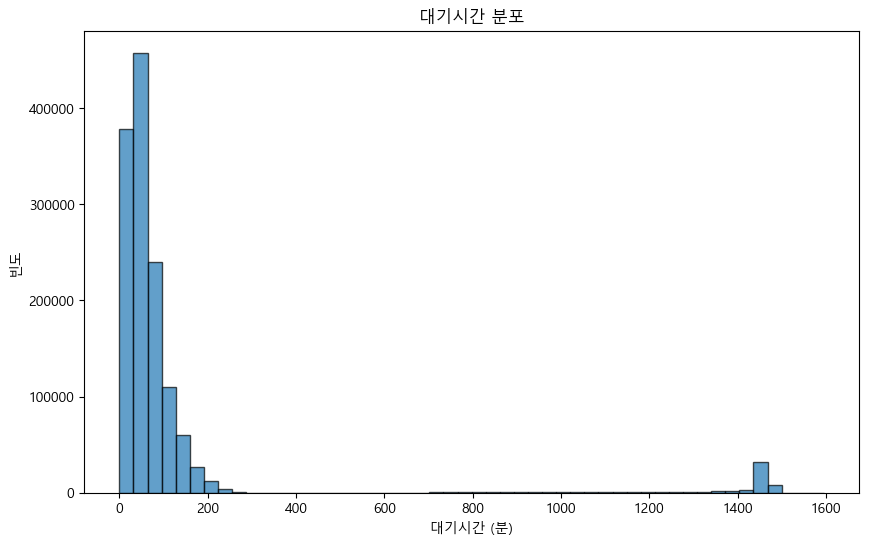

In [28]:
# 대기시간 분포 확인
plt.figure(figsize=(10, 6))
plt.hist(data['대기시간'], bins=50, edgecolor='k', alpha=0.7)
plt.title('대기시간 분포')
plt.xlabel('대기시간 (분)')
plt.ylabel('빈도')
plt.show()

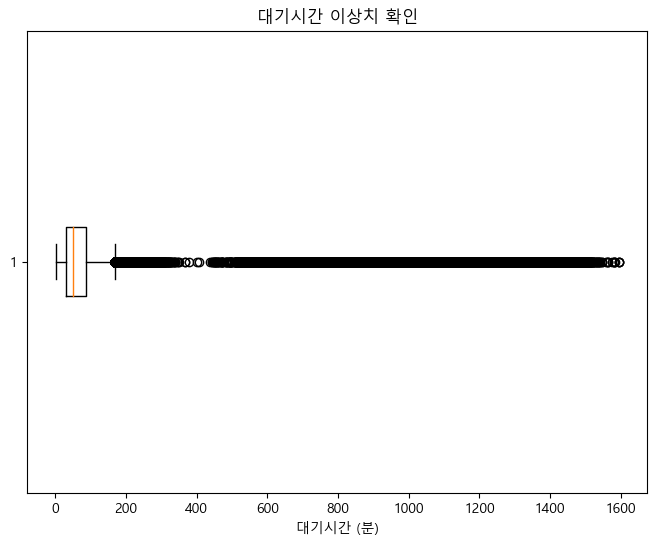

In [29]:
# 대기시간의 이상치를 시각화
plt.figure(figsize=(8, 6))
plt.boxplot(data['대기시간'].dropna(), vert=False)
plt.xlabel('대기시간 (분)')
plt.title('대기시간 이상치 확인')

# 그래프 출력
plt.show()

In [30]:
# 대기시간 이상치 탐지 및 처리: IQR 방식
Q1 = data['대기시간'].quantile(0.25)  # 1사분위
Q3 = data['대기시간'].quantile(0.75)  # 3사분위
IQR = Q3 - Q1  # IQR 계산

# 이상치 범위 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# IQR 방식으로 이상치 제거
data = data[(data['대기시간'] >= lower_bound) & (data['대기시간'] <= upper_bound)]

# 이상치 제거 후 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257785 entries, 2973701 to 4746064
Data columns (total 14 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   접수일시    1257785 non-null  datetime64[ns]
 1   예정일시    1257785 non-null  object        
 2   배차일시    1257785 non-null  object        
 3   승차일시    1257785 non-null  datetime64[ns]
 4   하차일시    1257785 non-null  object        
 5   출발지구    1257785 non-null  object        
 6   출발지동    1257785 non-null  object        
 7   목적지구    1257785 non-null  object        
 8   목적지동    1257785 non-null  object        
 9   요금      1257785 non-null  object        
 10  승차거리    1257785 non-null  float64       
 11  유형      1257785 non-null  object        
 12  대기시간    1257785 non-null  float64       
 13  공휴일     1257785 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(9)
memory usage: 143.9+ MB


## 8.5 해당년도가 아닌 행 삭제
- 꼭 맡으신 연도로 바꿔주셔야합니다!

In [31]:
import pandas as pd

# datetime 형식으로 변환
# 이미 datatime으로 변환되었다면 주석처리하고 진행해주세요!
date_columns = ['접수일시', '예정일시', '배차일시', '승차일시', '하차일시']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# 2021, 2022, 2023년 범위 내의 데이터만 남기고, 나머지 데이터는 제외
non_year_rows = data[~data[date_columns].apply(lambda x: x.dt.year.isin([2021, 2022, 2023])).all(axis=1)]

# 해당년이 아닌 날짜가 있는지 확인 후 처리
if not non_year_rows.empty:
    print("설정년도가 아닌 날짜가 포함된 행이 있습니다. 해당 행을 삭제합니다.")
    # 해당년이 아닌 날짜가 있는 행 삭제
    data = data[data[date_columns].apply(lambda x: x.dt.year.isin([2021, 2022, 2023])).all(axis=1)]
    print(f"삭제 후 남은 행 수: {len(data)}")
else:
    print("모든 날짜가 설정하신 년도입니다. 삭제할 행이 없습니다.")

# 결과 확인
print("데이터 확인:")
print(data.head())

설정년도가 아닌 날짜가 포함된 행이 있습니다. 해당 행을 삭제합니다.
삭제 후 남은 행 수: 1257762
데이터 확인:
                       접수일시                예정일시                배차일시  \
2973701 2022-12-31 23:59:50 2023-01-01 00:00:00 2023-01-01 00:53:06   
2973702 2023-01-01 00:00:35 2023-01-01 00:00:35 2023-01-01 00:34:18   
2973703 2023-01-01 00:01:39 2023-01-01 00:01:39 2023-01-01 01:02:43   
2973704 2023-01-01 00:02:12 2023-01-01 00:02:12 2023-01-01 00:46:13   
2973706 2023-01-01 00:04:43 2023-01-01 00:04:43 2023-01-01 00:52:28   

                       승차일시                하차일시 출발지구   출발지동 목적지구   목적지동    요금  \
2973701 2023-01-01 01:19:18 2023-01-01 01:31:46  도봉구  도봉제2동  노원구   상계2동  1500   
2973702 2023-01-01 00:44:51 2023-01-01 00:53:37  양천구   신정4동  강서구  화곡제4동  1500   
2973703 2023-01-01 01:39:29 2023-01-01 02:13:15  은평구  응암제2동  관악구    미성동  3500   
2973704 2023-01-01 01:12:38 2023-01-01 01:23:29  중랑구  중화제1동  중랑구   신내2동  1500   
2973706 2023-01-01 01:02:38 2023-01-01 01:18:38  강동구    상일동  강동구  성내제2동  1500   

            승차거리  

# 9. 출발지구별 Top5 기준 필터링

## 9.1 출발지구별 이용 수 상위 5개 갯수 확인

In [32]:
# 출발지구별 이용수 상위 5개 추출
top_departure_areas = data['출발지구'].value_counts().head(5)

# 상위 5개 지역을 확인
print(top_departure_areas)

# 출발지동별 이용 건수 상위 5개 추출
top_departure_areas2 = data['출발지동'].value_counts().head(5)

# 상위 5개 지역을 확인
print(top_departure_areas2)

노원구     133361
강서구      87082
강동구      69941
서대문구     68950
은평구      68638
Name: 출발지구, dtype: int64
하계1동      30219
상계6.7동    25604
신촌동       22314
성산제2동     21118
연희동       15341
Name: 출발지동, dtype: int64


## 9.2 출발지구별 이용 수 상위 5개 필터링
- 인덱스 재생성

In [33]:
# 출발지구별 이용 건수 상위 5개를 먼저 추출하고, 이 상위 5개만 남겨둔 데이터프레임을 구성
top_departure_areas = data['출발지구'].value_counts().head(5).index
data = data[data['출발지구'].isin(top_departure_areas)]
data = data.reset_index(drop=True)

# 상위 5개 출발지구만 남긴 데이터프레임을 확인
data.head()

,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,유형,대기시간,공휴일
0,2023-01-01 00:01:39,2023-01-01 00:01:39,2023-01-01 01:02:43,2023-01-01 01:39:29,2023-01-01 02:13:15,은평구,응암제2동,관악구,미성동,3500,18860.0,뇌병,97.833333,1
1,2023-01-01 00:04:43,2023-01-01 00:04:43,2023-01-01 00:52:28,2023-01-01 01:02:38,2023-01-01 01:18:38,강동구,상일동,강동구,성내제2동,1500,4830.0,지체,57.916667,1
2,2023-01-01 00:29:41,2023-01-01 00:29:41,2023-01-01 01:20:17,2023-01-01 01:37:50,2023-01-01 02:12:31,강서구,가양제2동,관악구,대학동,3500,18288.0,지체,68.150000,1
3,2023-01-01 01:08:21,2023-01-01 01:09:00,2023-01-01 01:50:28,2023-01-01 02:39:20,2023-01-01 02:54:33,서대문구,신촌동,서대문구,홍제제2동,1500,4989.0,지적,90.983333,1
4,2023-01-01 02:31:41,2023-01-01 02:32:00,2023-01-01 03:21:38,2023-01-01 04:00:54,2023-01-01 04:21:31,강서구,가양제1동,동작구,노량진제1동,3100,13896.0,뇌병,89.216667,1


In [34]:
# 필터링 후 데이터 갯수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427972 entries, 0 to 427971
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   접수일시    427972 non-null  datetime64[ns]
 1   예정일시    427972 non-null  datetime64[ns]
 2   배차일시    427972 non-null  datetime64[ns]
 3   승차일시    427972 non-null  datetime64[ns]
 4   하차일시    427972 non-null  datetime64[ns]
 5   출발지구    427972 non-null  object        
 6   출발지동    427972 non-null  object        
 7   목적지구    427972 non-null  object        
 8   목적지동    427972 non-null  object        
 9   요금      427972 non-null  object        
 10  승차거리    427972 non-null  float64       
 11  유형      427972 non-null  object        
 12  대기시간    427972 non-null  float64       
 13  공휴일     427972 non-null  int64         
dtypes: datetime64[ns](5), float64(2), int64(1), object(6)
memory usage: 45.7+ MB


## 9.3 출발지구별 이용 수 상위 5개 갯수 전과 같은지 확인

In [35]:
# 출발지구별 이용 건수 상위 5개확인
top_departure_areas = data['출발지구'].value_counts().head(5)

# 상위 5개 지역을 확인
print(top_departure_areas)

# 출발지동별 이용 건수 상위 5개 확인
top_departure_areas2 = data['출발지동'].value_counts().head(5)

# 상위 5개 지역을 확인
print(top_departure_areas2)
top_departure_areas2

노원구     133361
강서구      87082
강동구      69941
서대문구     68950
은평구      68638
Name: 출발지구, dtype: int64
하계1동      30219
상계6.7동    25604
신촌동       22314
연희동       15341
역촌동       13086
Name: 출발지동, dtype: int64


하계1동      30219
상계6.7동    25604
신촌동       22314
연희동       15341
역촌동       13086
Name: 출발지동, dtype: int64

# 11. EDA

## 11.1 출발지구, 목적지구별 이용 수 시각화

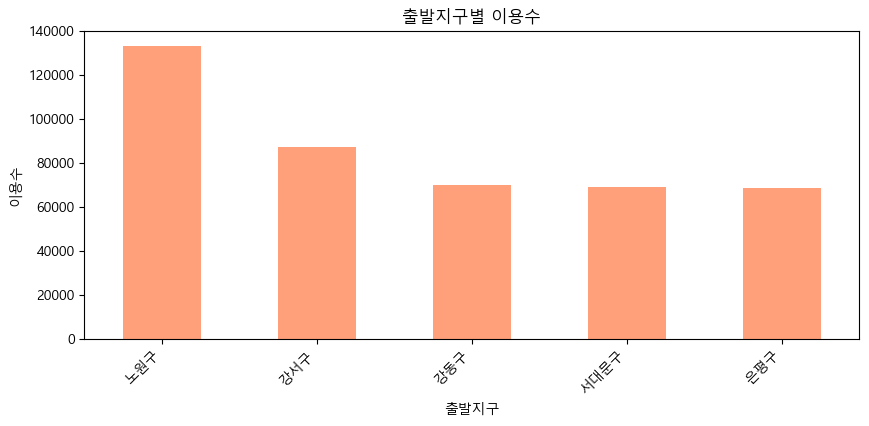

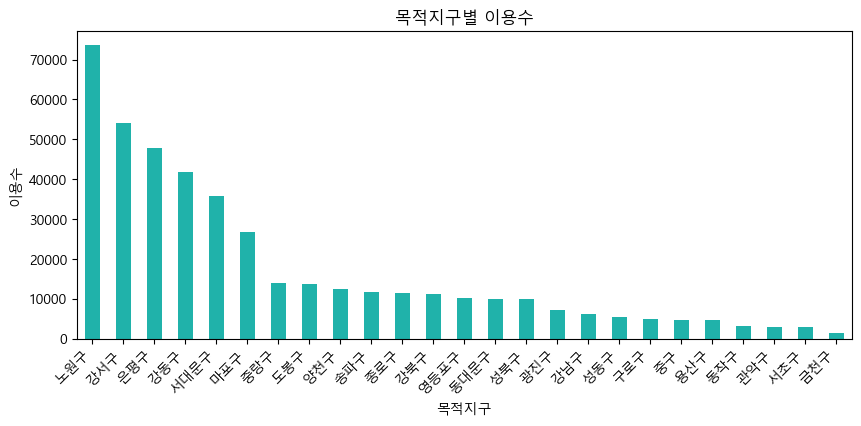

In [36]:
# 출발지구별 이용수 시각화
startgu_type_counts = data['출발지구'].value_counts()
plt.figure(figsize=(10, 4))
startgu_type_counts.plot(kind='bar', color='lightsalmon')
plt.title('출발지구별 이용수')
plt.xlabel('출발지구')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

# 목적지구별 이용수 시각화
endgu_type_counts = data['목적지구'].value_counts()
plt.figure(figsize=(10, 4))
endgu_type_counts.plot(kind='bar', color='lightseagreen')
plt.title('목적지구별 이용수')
plt.xlabel('목적지구')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

## 11.2 출발지동, 목적지동별 이용 수 시각화
- 동이 너무 많아 상위 20개만 추출

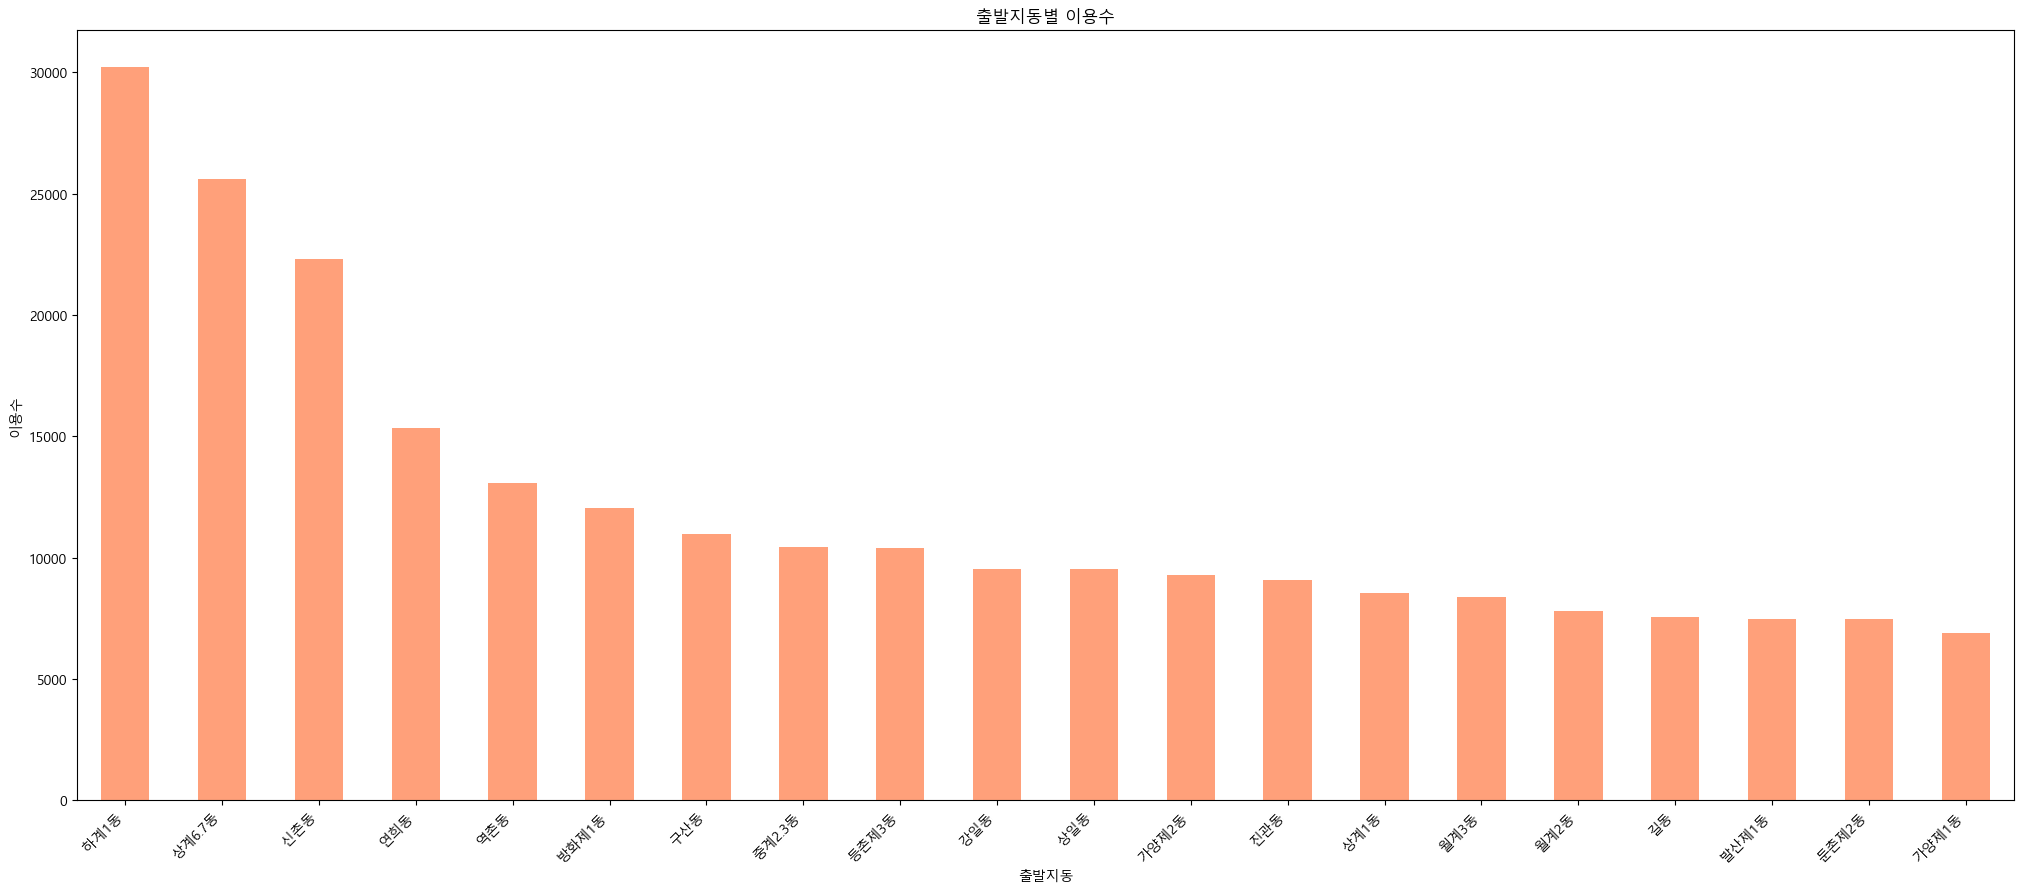

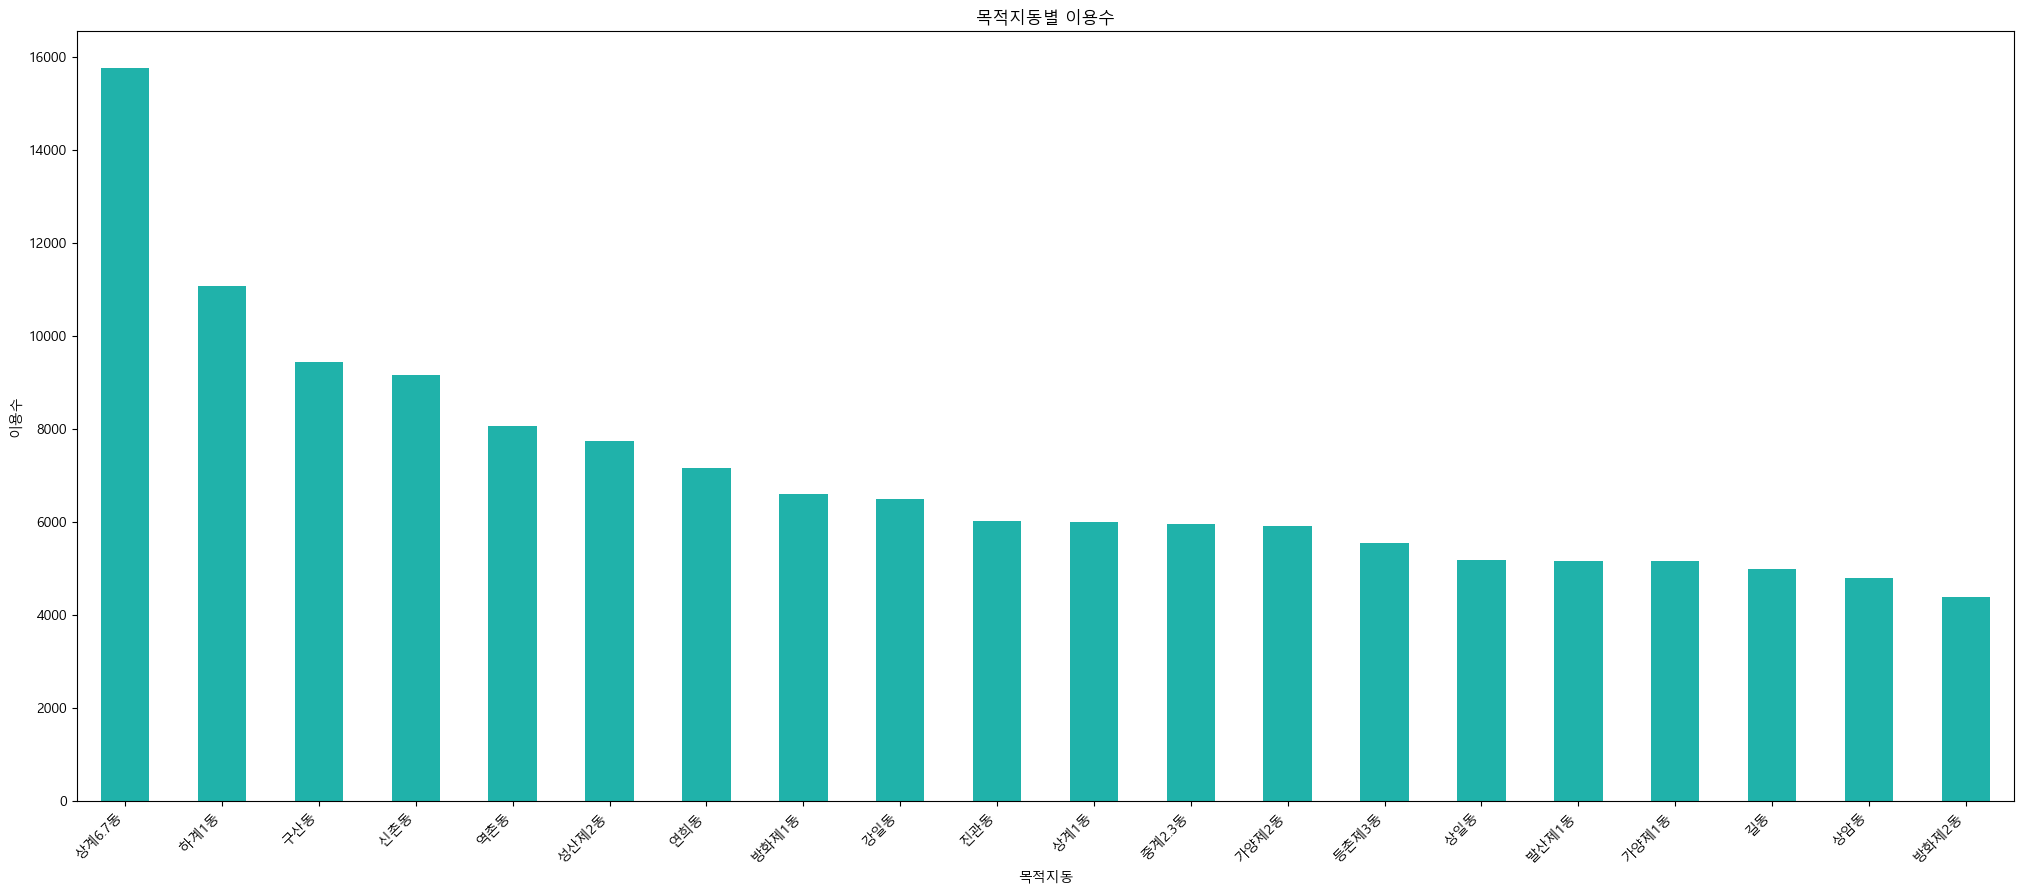

In [37]:
# 출발지동별 이용수 시각화
startdong_type_counts = data['출발지동'].value_counts().head(20)
plt.figure(figsize=(25, 10))
startdong_type_counts.plot(kind='bar', color='lightsalmon')
plt.title('출발지동별 이용수')
plt.xlabel('출발지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

# 목적지동별 이용수 시각화
enddong_type_counts = data['목적지동'].value_counts().head(20)
plt.figure(figsize=(25, 10))
enddong_type_counts.plot(kind='bar', color='lightseagreen')
plt.title('목적지동별 이용수')
plt.xlabel('목적지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

## 11.3 공휴일 출발지구, 목적지구별 이용수  시각화

노원구     2335
강서구     1809
강동구     1238
은평구     1143
서대문구     891
Name: 출발지구, dtype: int64
노원구     1225
강서구     1045
강동구      720
은평구      669
서대문구     452
Name: 목적지구, dtype: int64


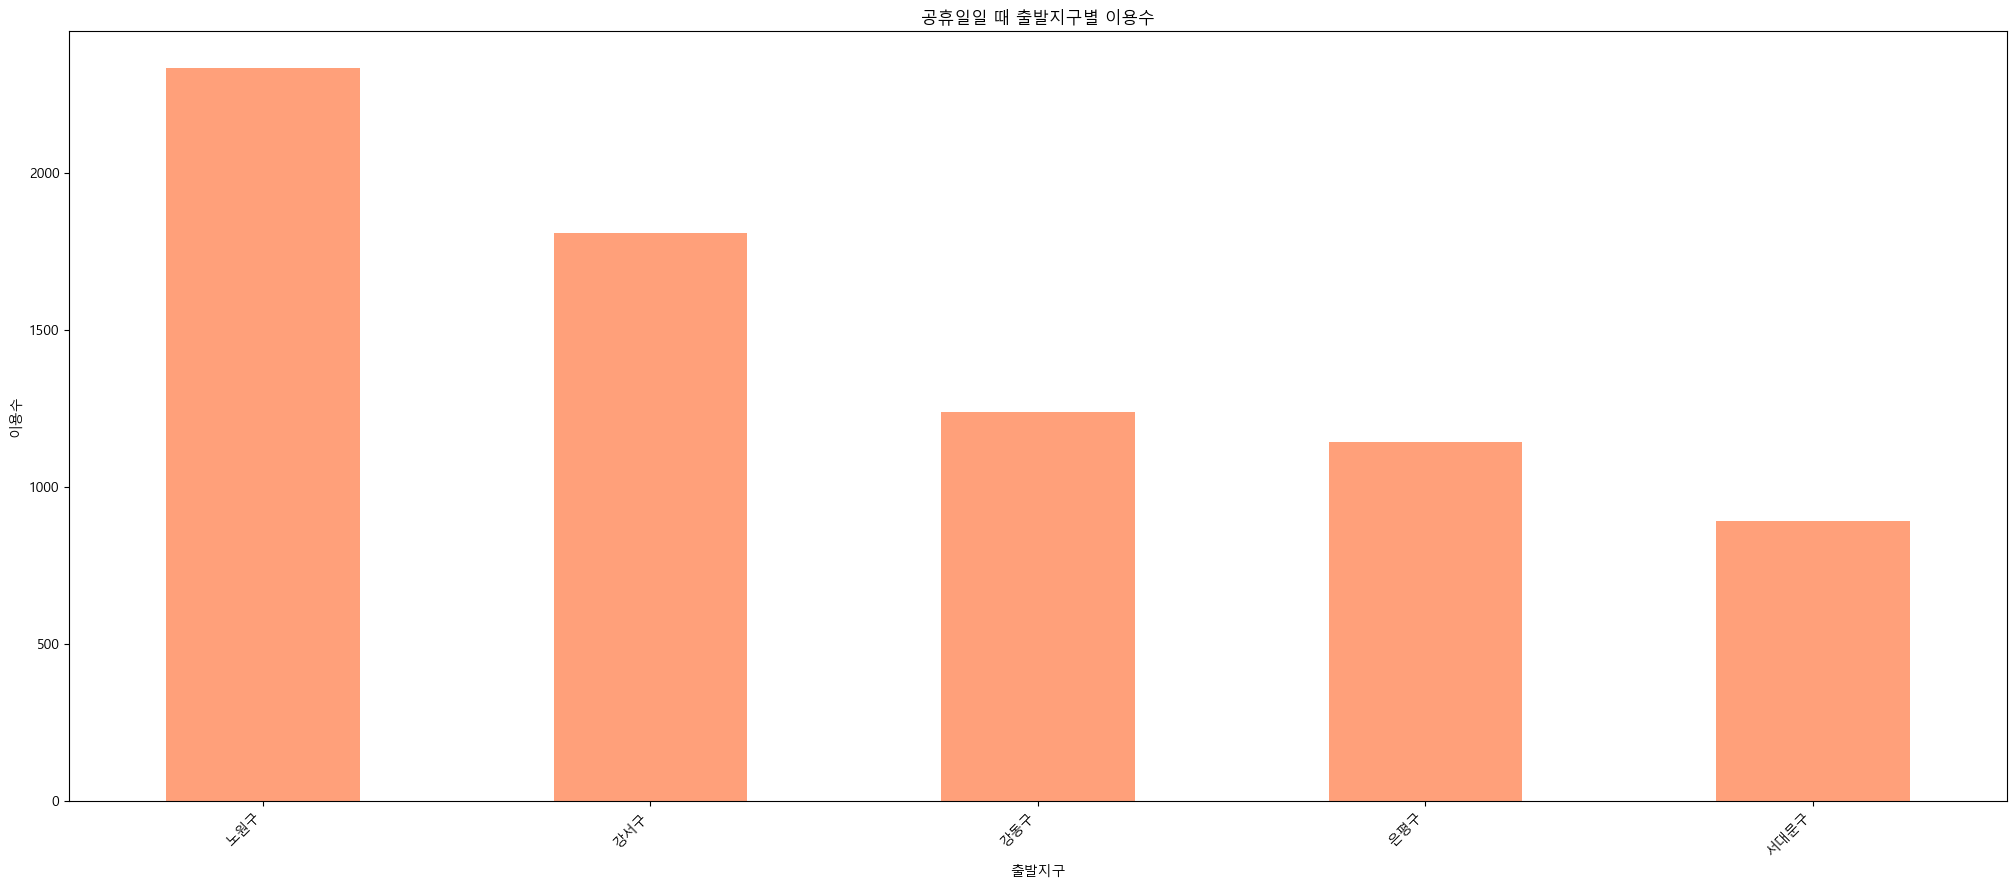

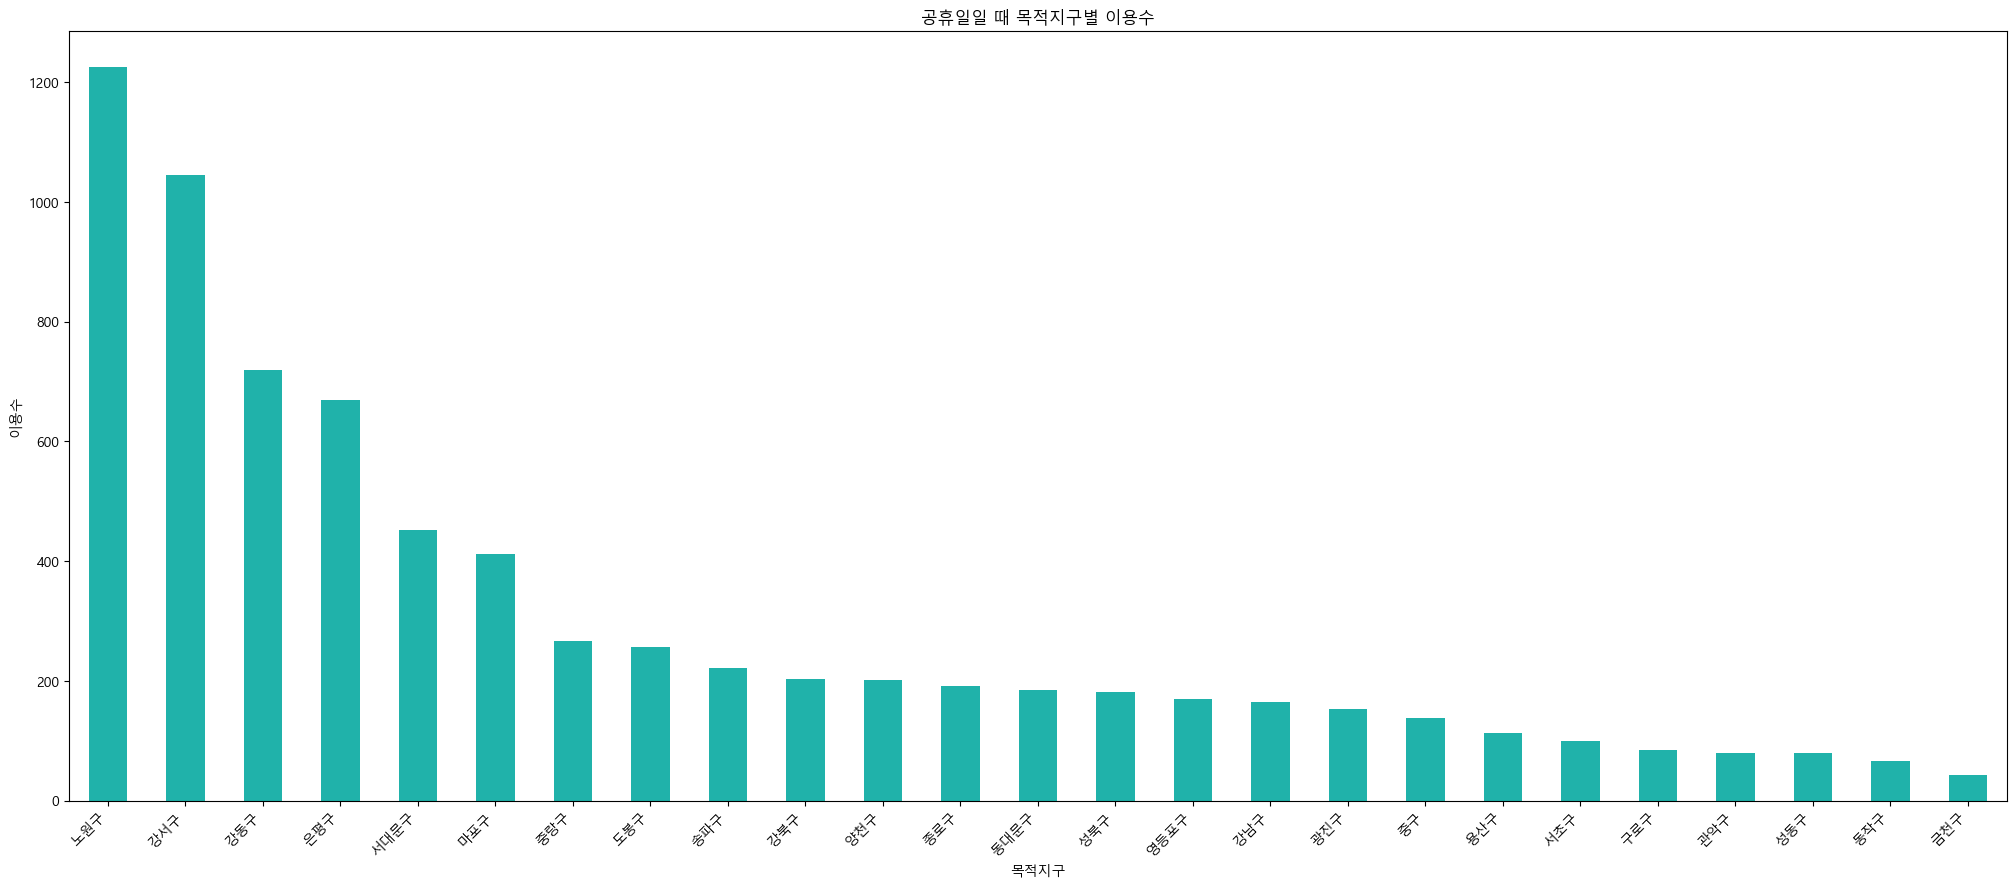

In [38]:
# 공휴일여부가 True인 데이터만 필터링
holiday_O = data[data['공휴일'] == 1]
holiday_1 = data[data['공휴일'] == 1]

# 출발지구별 이용수 시각화
startdong_type_counts = holiday_O['출발지구'].value_counts()
print(startdong_type_counts.head(5))

# 목적지구별 이용수 시각화
startdong_type_counts1 = holiday_1['목적지구'].value_counts()
print(startdong_type_counts1.head(5))

# 출발지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts.plot(kind='bar', color='lightsalmon')
plt.title('공휴일일 때 출발지구별 이용수')
plt.xlabel('출발지구')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

# 목적지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts1.plot(kind='bar', color='lightseagreen')
plt.title('공휴일일 때 목적지구별 이용수')
plt.xlabel('목적지구')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

## 11.4 공휴일 출발지동, 목적지동별 이용수 시각화

상계6.7동    327
하계1동      317
등촌제3동     297
중계2.3동    256
진관동       224
Name: 출발지동, dtype: int64
상계6.7동    188
등촌제3동     151
성산제2동     126
하계1동      119
강일동       114
Name: 목적지동, dtype: int64


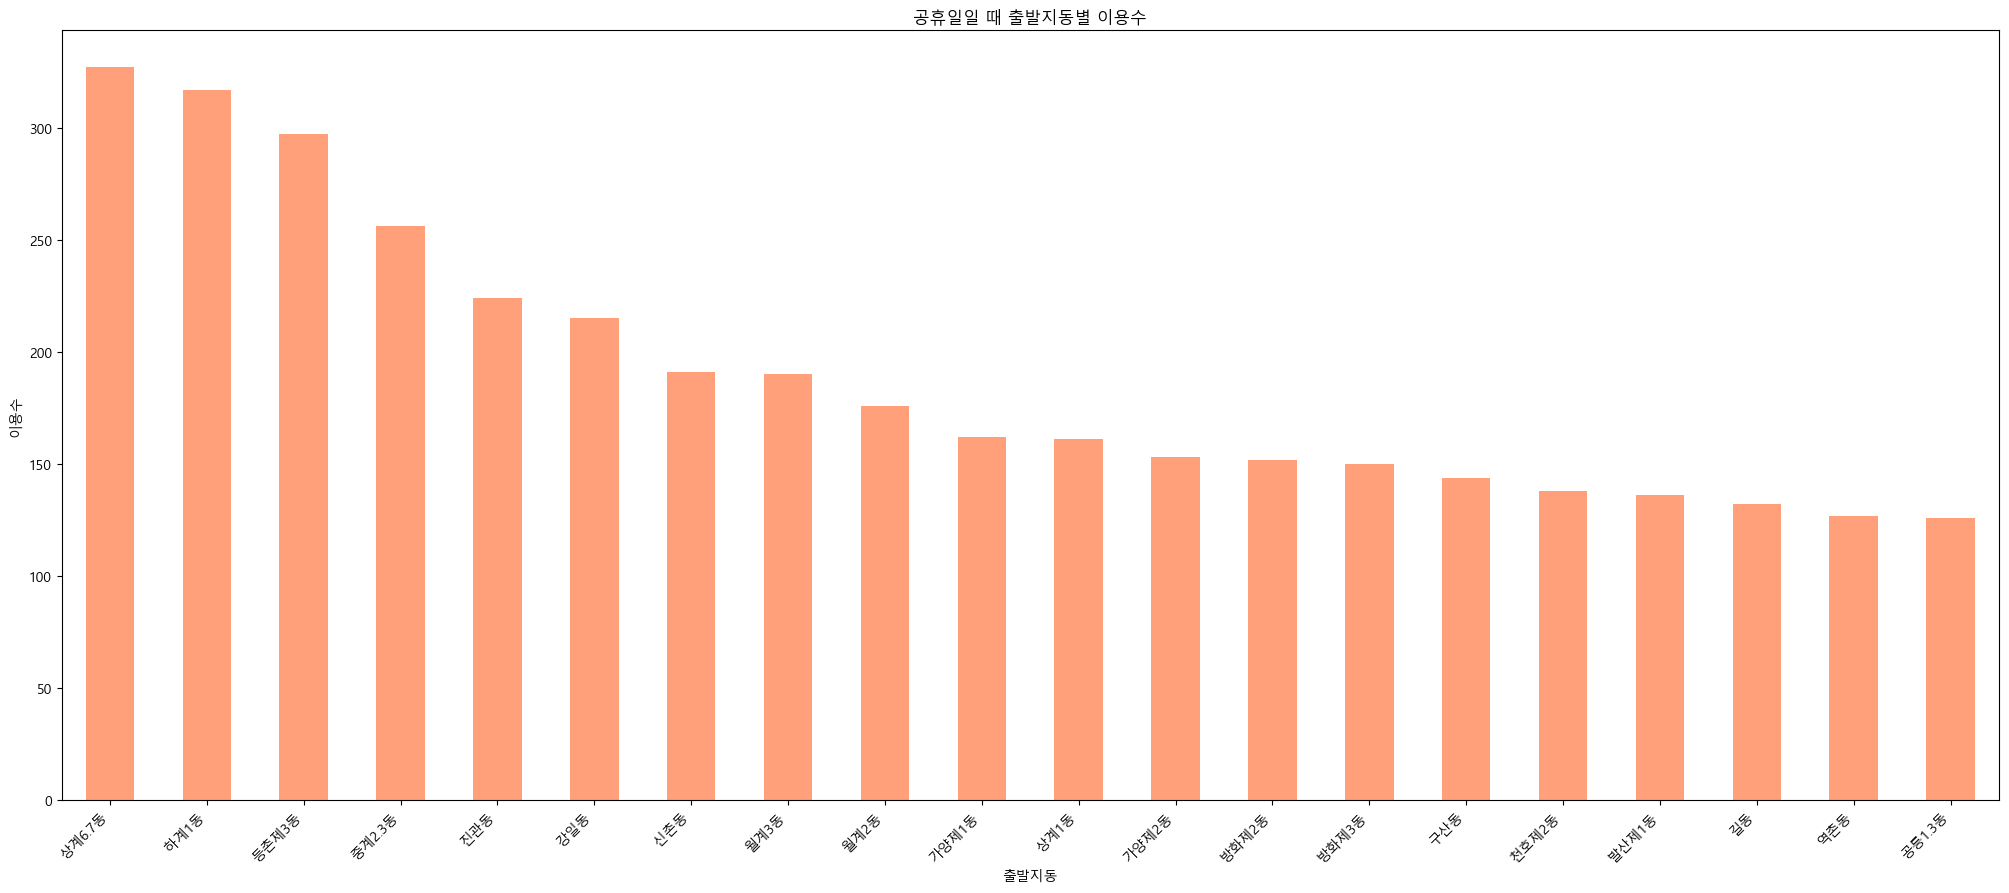

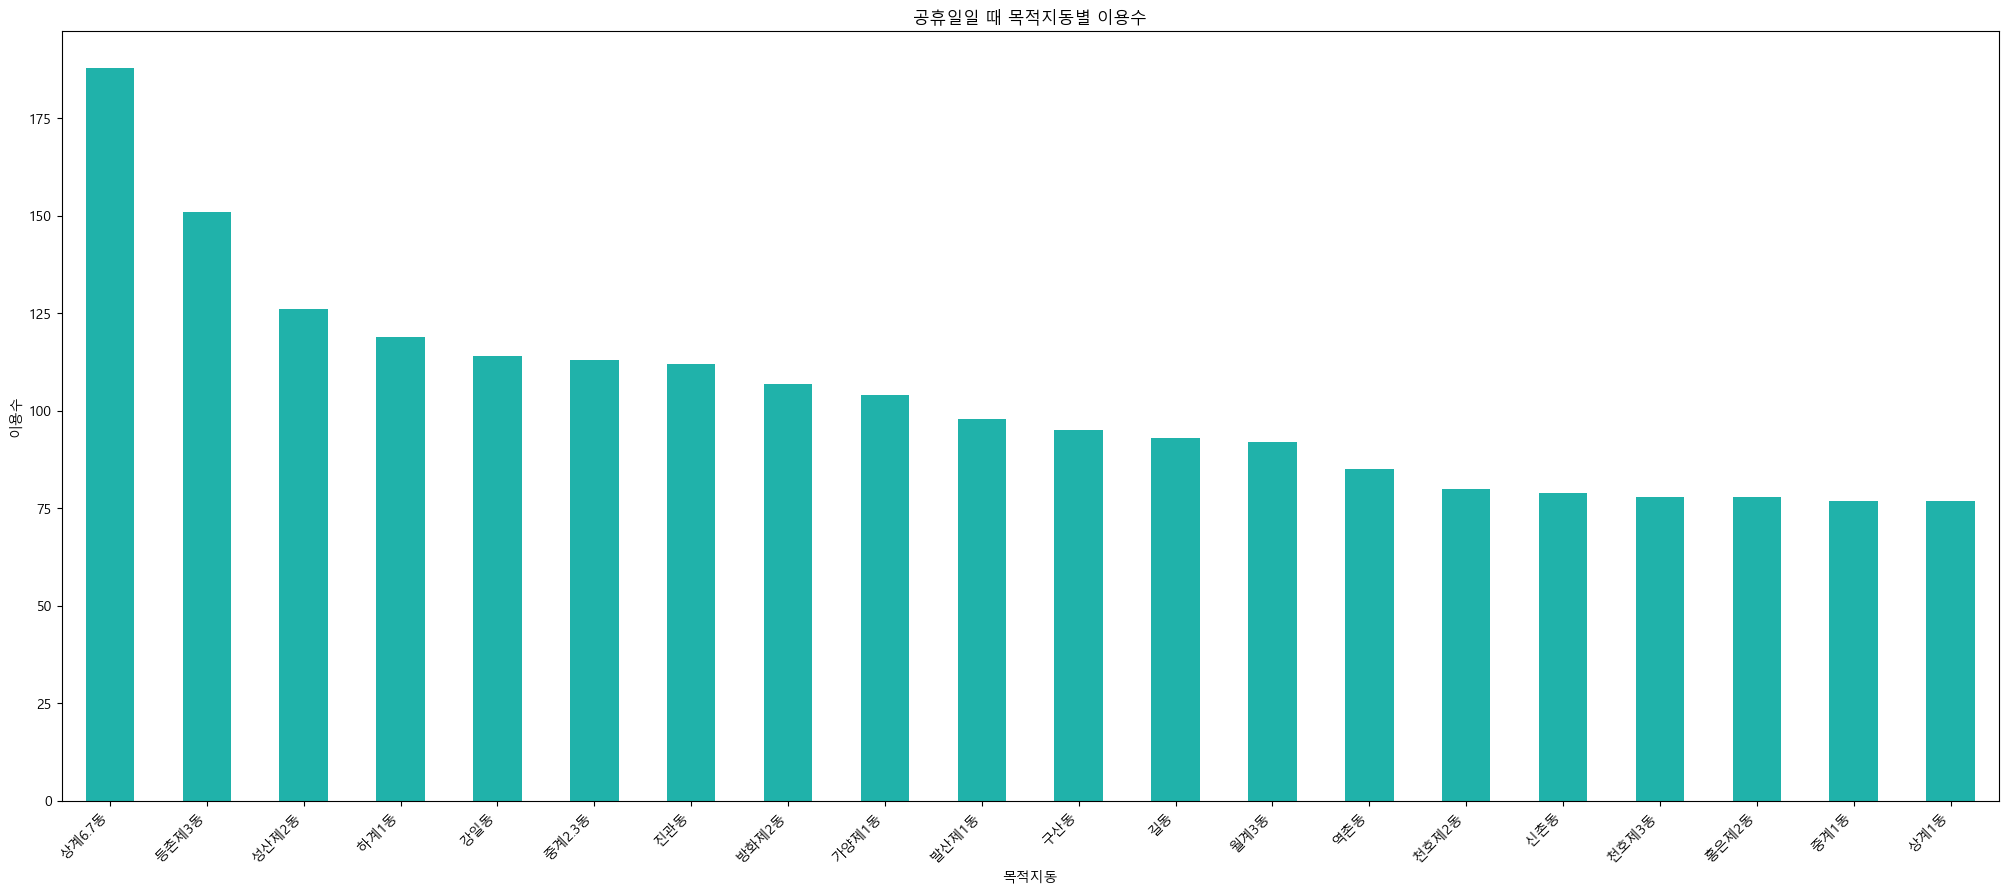

In [39]:
# 공휴일여부가 True인 데이터만 필터링
holiday_O = data[data['공휴일'] == 1]
holiday_1 = data[data['공휴일'] == 1]

# 출발지구별 이용수 시각화(상위 20개)
startdong_type_counts = holiday_O['출발지동'].value_counts().head(20)
print(startdong_type_counts.head(5))

# 목적지구별 이용수 시각화(상위 20개)
startdong_type_counts1 = holiday_1['목적지동'].value_counts().head(20)
print(startdong_type_counts1.head(5))

# 출발지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts.plot(kind='bar', color='lightsalmon')
plt.title('공휴일일 때 출발지동별 이용수')
plt.xlabel('출발지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

# 목적지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts1.plot(kind='bar', color='lightseagreen')
plt.title('공휴일일 때 목적지동별 이용수')
plt.xlabel('목적지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

## 11.5 공휴일아닐때 출발지구, 목적지구별 이용수 시각화

노원구     131026
강서구      85273
강동구      68703
서대문구     68059
은평구      67495
Name: 출발지구, dtype: int64
노원구     72356
강서구     52950
은평구     47052
강동구     41120
서대문구    35308
Name: 목적지구, dtype: int64


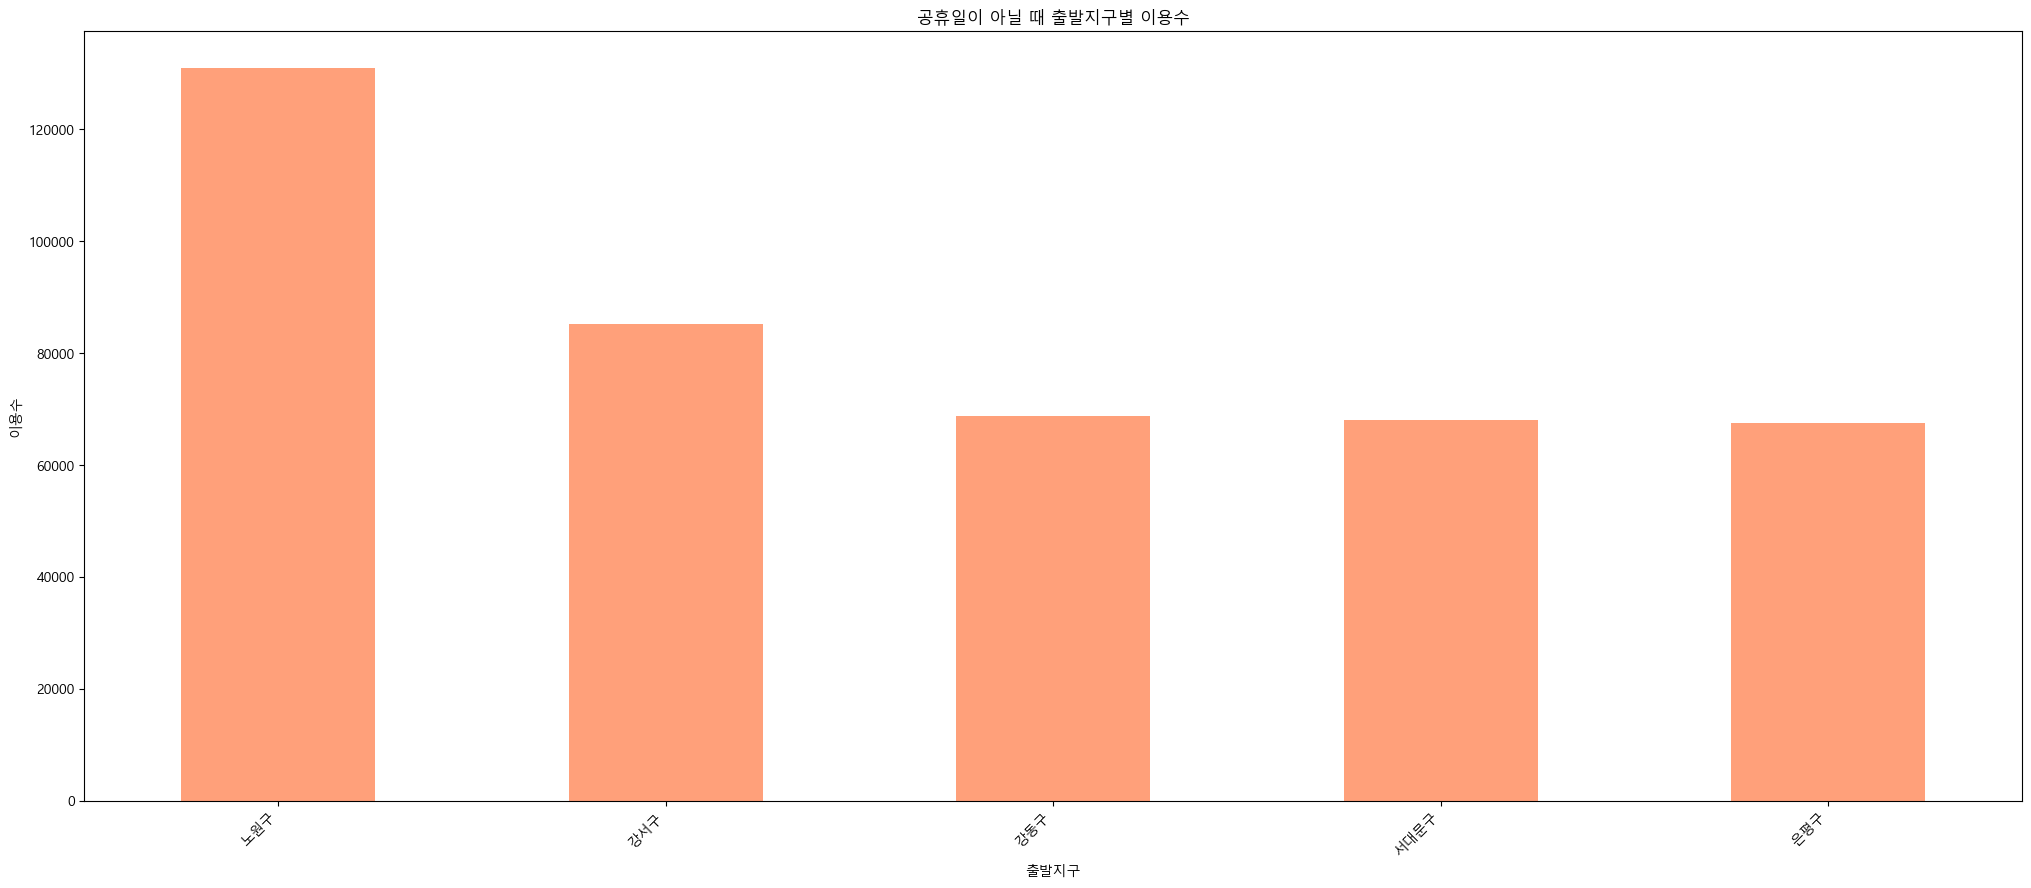

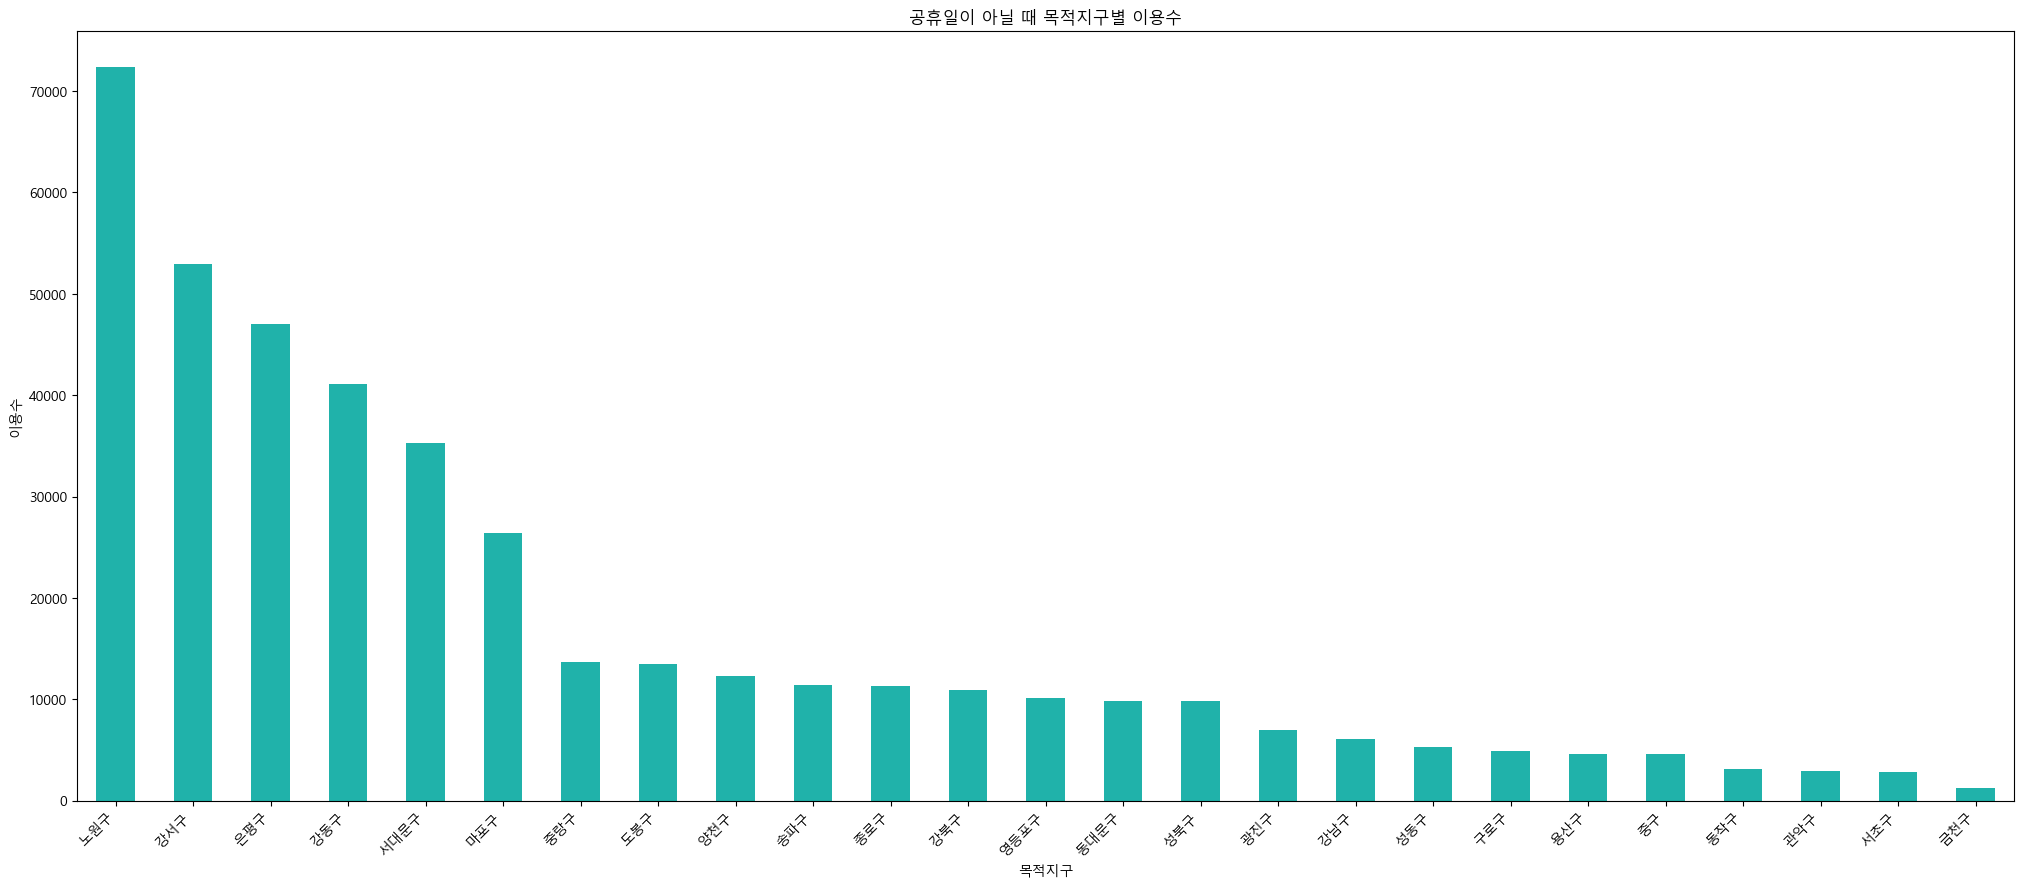

In [40]:
# 공휴일여부가 True인 데이터만 필터링
holiday_O = data[data['공휴일'] == 0]
holiday_1 = data[data['공휴일'] == 0]

# 출발지구별 이용수 시각화
startdong_type_counts = holiday_O['출발지구'].value_counts()
print(startdong_type_counts.head(5))

# 목적지구별 이용수 시각화
startdong_type_counts1 = holiday_1['목적지구'].value_counts()
print(startdong_type_counts1.head(5))

# 출발지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts.plot(kind='bar', color='lightsalmon')
plt.title('공휴일이 아닐 때 출발지구별 이용수')
plt.xlabel('출발지구')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

# 목적지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts1.plot(kind='bar', color='lightseagreen')
plt.title('공휴일이 아닐 때 목적지구별 이용수')
plt.xlabel('목적지구')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

## 11.6 공휴일 아닐때 출발지동, 목적지동별 이용수 시각화

하계1동      29902
상계6.7동    25277
신촌동       22123
연희동       15217
역촌동       12959
Name: 출발지동, dtype: int64
상계6.7동    15575
하계1동      10951
구산동        9340
신촌동        9081
역촌동        7969
Name: 목적지동, dtype: int64


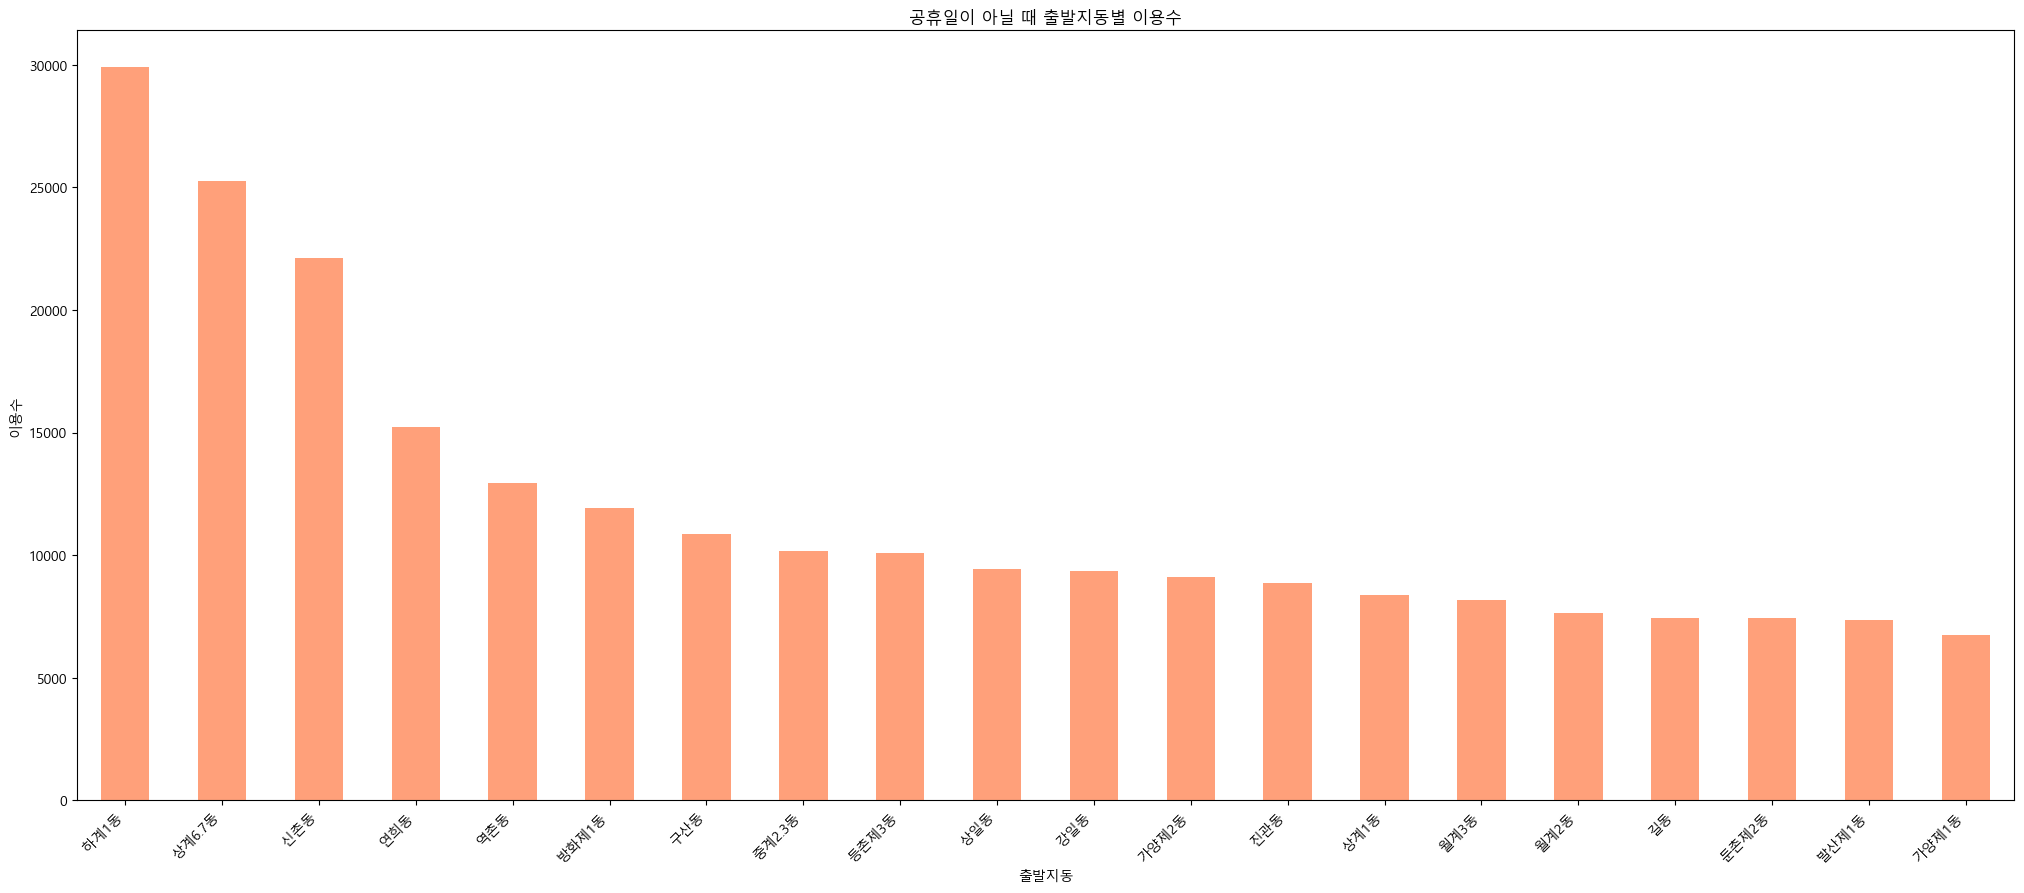

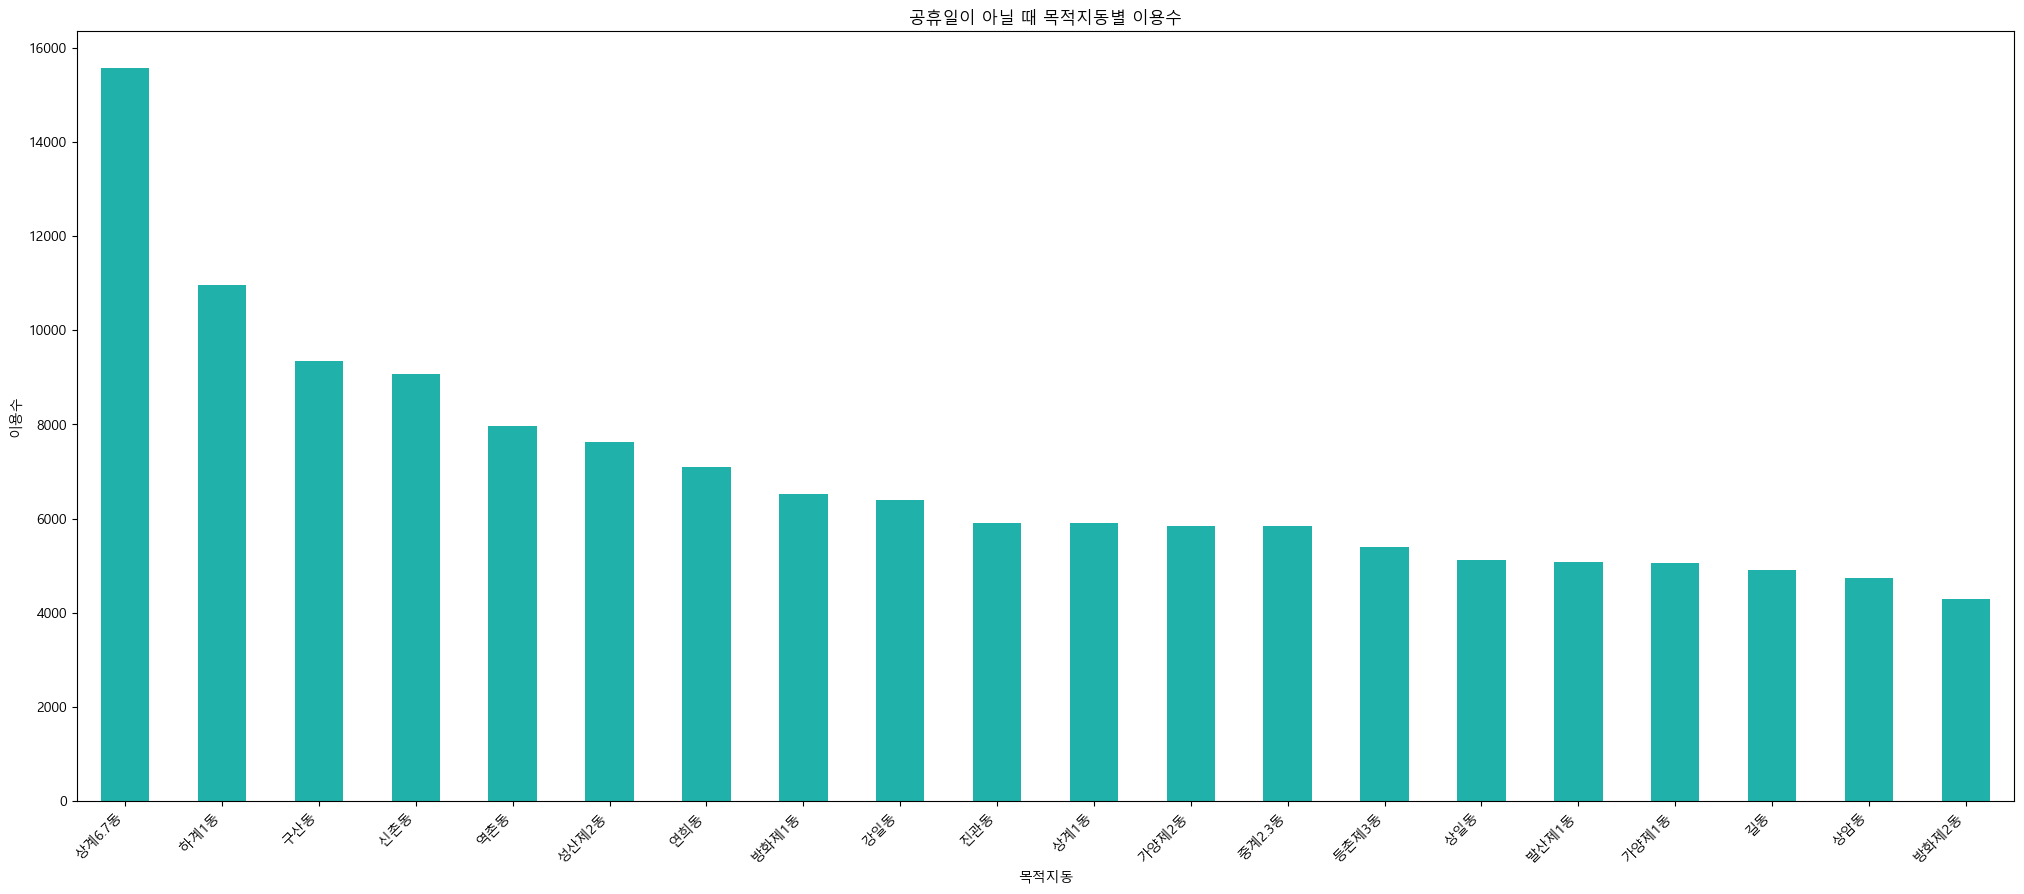

In [41]:
# 공휴일여부가 True인 데이터만 필터링
holiday_O = data[data['공휴일'] == 0]
holiday_1 = data[data['공휴일'] == 0]

# 출발지구별 이용수 시각화
startdong_type_counts = holiday_O['출발지동'].value_counts().head(20)
print(startdong_type_counts.head(5))

# 목적지구별 이용수 시각화
startdong_type_counts1 = holiday_1['목적지동'].value_counts().head(20)
print(startdong_type_counts1.head(5))

# 출발지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts.plot(kind='bar', color='lightsalmon')
plt.title('공휴일이 아닐 때 출발지동별 이용수')
plt.xlabel('출발지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

# 목적지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts1.plot(kind='bar', color='lightseagreen')
plt.title('공휴일이 아닐 때 목적지동별 이용수')
plt.xlabel('목적지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

## 11.7 월, 요일, 시간대별 평균 대기시간 시각화

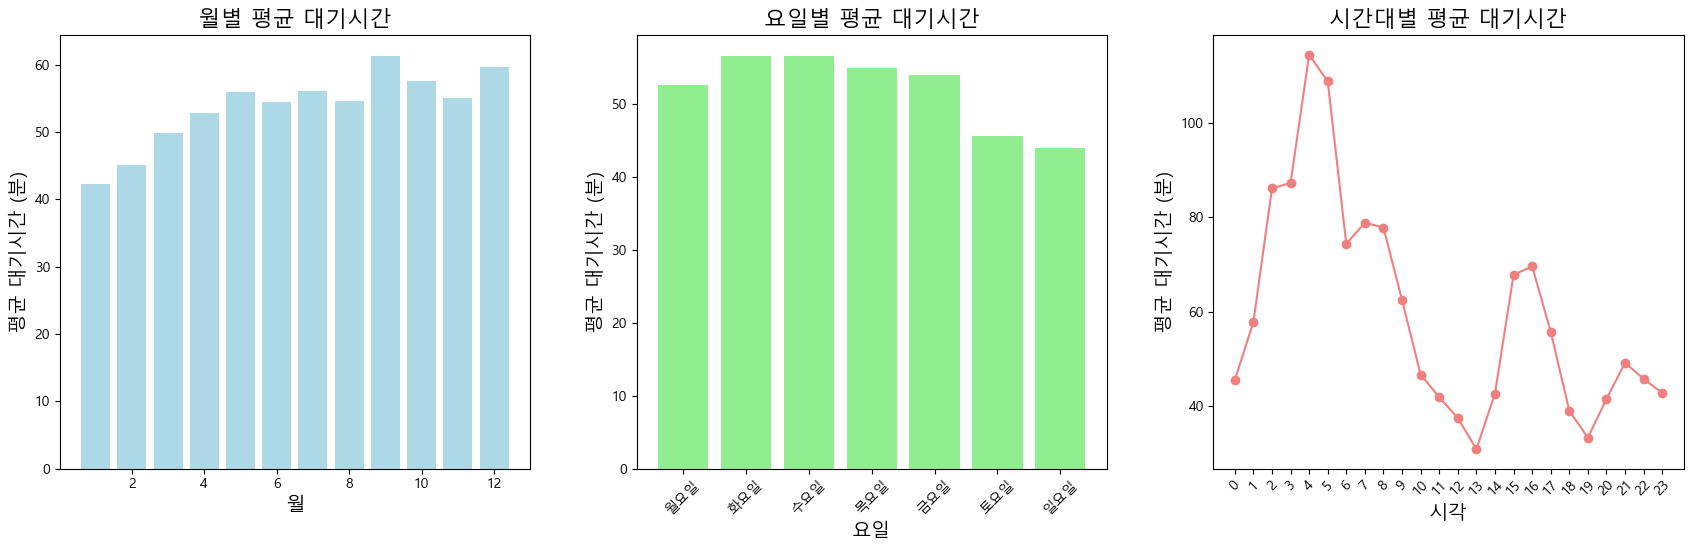

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# 날짜 및 대기시간 데이터 준비
data['접수일시'] = pd.to_datetime(data['접수일시'])
data['대기시간'] = pd.to_numeric(data['대기시간'], errors='coerce')  # 숫자형 변환

# 월, 요일, 시각 데이터 추출
data['접수일시_월'] = data['접수일시'].dt.month
data['접수일시_요일'] = data['접수일시'].dt.dayofweek  # 0: 월요일, 6: 일요일
data['접수일시_시각'] = data['접수일시'].dt.hour

# 1) 월별 평균 대기시간
monthly_avg_waiting = data.groupby('접수일시_월')['대기시간'].mean()

# 2) 요일별 평균 대기시간
weekday_avg_waiting = data.groupby('접수일시_요일')['대기시간'].mean()
weekday_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

# 요일을 한국어로 매핑하고 순서 재정렬
weekday_avg_waiting.index = weekday_avg_waiting.index.map({
    0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일',
    4: '금요일', 5: '토요일', 6: '일요일'
})
weekday_avg_waiting = weekday_avg_waiting.reindex(weekday_order)

# 3) 시간대별 평균 대기시간
hourly_avg_waiting = data.groupby('접수일시_시각')['대기시간'].mean()

# 그래프 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.tight_layout(pad=5)

# 1) 월별 평균 대기시간 그래프 (Light Blue)
axes[0].bar(monthly_avg_waiting.index, monthly_avg_waiting.values, color='lightblue')
axes[0].set_title('월별 평균 대기시간', fontsize=16)
axes[0].set_xlabel('월', fontsize=14)
axes[0].set_ylabel('평균 대기시간 (분)', fontsize=14)
axes[0].tick_params(axis='x', rotation=0)

# 2) 요일별 평균 대기시간 그래프 (Light Green)
axes[1].bar(weekday_avg_waiting.index, weekday_avg_waiting.values, color='lightgreen')
axes[1].set_title('요일별 평균 대기시간', fontsize=16)
axes[1].set_xlabel('요일', fontsize=14)
axes[1].set_ylabel('평균 대기시간 (분)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# 3) 시간대별 평균 대기시간 그래프 (Light Coral)
axes[2].plot(hourly_avg_waiting.index, hourly_avg_waiting.values, color='lightcoral', marker='o')
axes[2].set_title('시간대별 평균 대기시간', fontsize=16)
axes[2].set_xlabel('시각', fontsize=14)
axes[2].set_ylabel('평균 대기시간 (분)', fontsize=14)
axes[2].set_xticks(range(0, 24))
axes[2].tick_params(axis='x', rotation=45)

plt.show()

## 11.8 월, 요일, 시간대별 이용 수 시각화

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427972 entries, 0 to 427971
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   접수일시     427972 non-null  datetime64[ns]
 1   예정일시     427972 non-null  datetime64[ns]
 2   배차일시     427972 non-null  datetime64[ns]
 3   승차일시     427972 non-null  datetime64[ns]
 4   하차일시     427972 non-null  datetime64[ns]
 5   출발지구     427972 non-null  object        
 6   출발지동     427972 non-null  object        
 7   목적지구     427972 non-null  object        
 8   목적지동     427972 non-null  object        
 9   요금       427972 non-null  object        
 10  승차거리     427972 non-null  float64       
 11  유형       427972 non-null  object        
 12  대기시간     427972 non-null  float64       
 13  공휴일      427972 non-null  int64         
 14  접수일시_월   427972 non-null  int64         
 15  접수일시_요일  427972 non-null  int64         
 16  접수일시_시각  427972 non-null  int64         
dtypes: datetim

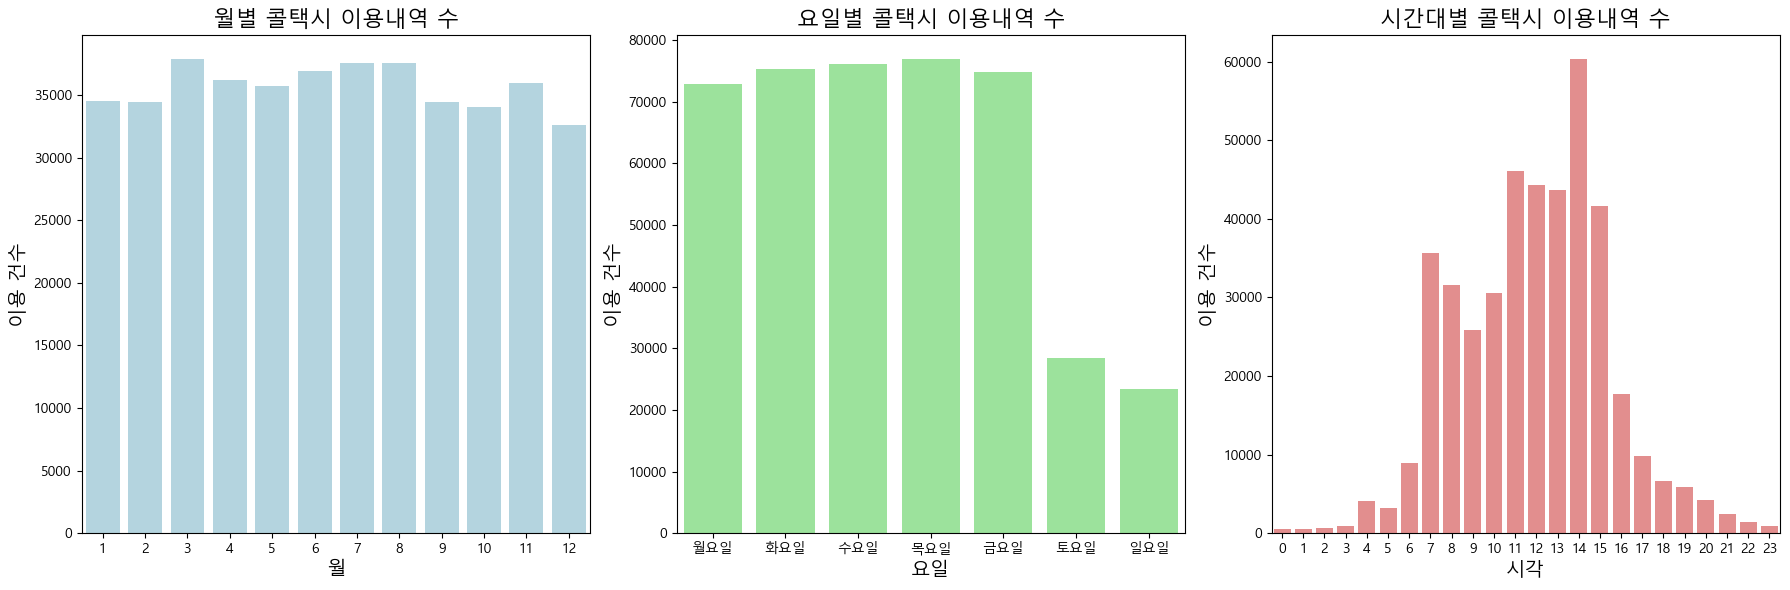

In [44]:
# 한 행에 세 개의 그래프 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1) 월별 콜택시 이용내역 수 (Light Blue)
monthly_data = data['접수일시_월'].value_counts().sort_index()
sns.barplot(x=monthly_data.index, y=monthly_data.values, color="lightblue", ax=axes[0])
axes[0].set_title('월별 콜택시 이용내역 수', fontsize=16)
axes[0].set_xlabel('월', fontsize=14)
axes[0].set_ylabel('이용 건수', fontsize=14)

# 2) 요일별 콜택시 이용내역 수 (Light Green)
weekday_data = data['접수일시_요일'].value_counts().sort_index()
weekday_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

# 요일을 한국어로 매핑하고 순서 재정렬
weekday_data.index = weekday_data.index.map({
    0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일',
    4: '금요일', 5: '토요일', 6: '일요일'
})
weekday_data = weekday_data.reindex(weekday_order)
sns.barplot(x=weekday_data.index, y=weekday_data.values, color="lightgreen", ax=axes[1])
axes[1].set_title('요일별 콜택시 이용내역 수', fontsize=16)
axes[1].set_xlabel('요일', fontsize=14)
axes[1].set_ylabel('이용 건수', fontsize=14)

# 3) 시간대별 콜택시 이용내역 수 (Light Coral)
hourly_data = data['접수일시_시각'].value_counts().sort_index()
sns.barplot(x=hourly_data.index, y=hourly_data.values, color="lightcoral", ax=axes[2])
axes[2].set_title('시간대별 콜택시 이용내역 수', fontsize=16)
axes[2].set_xlabel('시각', fontsize=14)
axes[2].set_ylabel('이용 건수', fontsize=14)

plt.tight_layout()
plt.show()

## 11.9 시간대별 평균 대기시간(모든 일자)

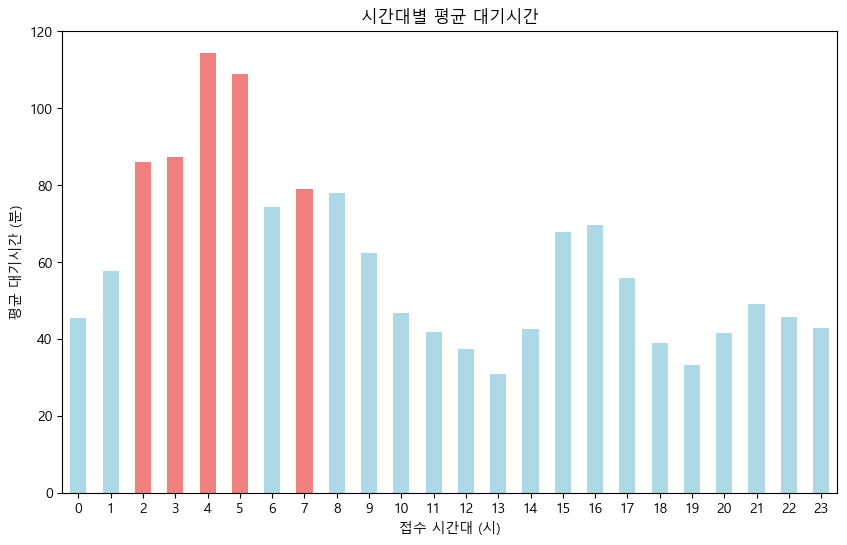

In [45]:
import matplotlib.pyplot as plt

# '접수일시_시각'을 사용하여 시간대별 '대기시간' 평균 계산
time_wait_avg = data.groupby('접수일시_시각')['대기시간'].mean()

# 상위 5개의 시간대를 찾음
top_5_time = time_wait_avg.nlargest(5).index

# 색상 리스트 생성 (상위 5개는 lightcoral, 나머지는 lightblue)
colors = ['lightcoral' if time in top_5_time else 'lightblue' for time in time_wait_avg.index]

# 그래프 생성
plt.figure(figsize=(10, 6))
time_wait_avg.plot(kind='bar', color=colors)

# 그래프 설정
plt.title('시간대별 평균 대기시간')
plt.xlabel('접수 시간대 (시)')
plt.ylabel('평균 대기시간 (분)')
plt.xticks(rotation=0)
plt.show()


## 11.10 시간대별 평균 대기시간(평일)

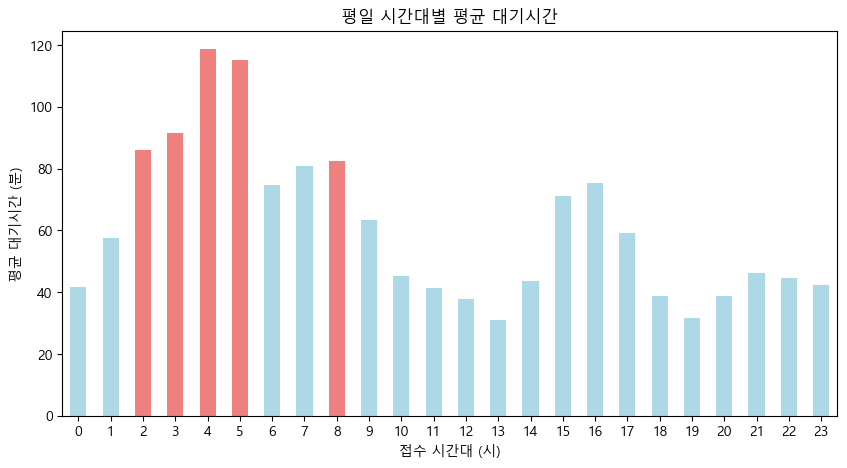

In [46]:
import matplotlib.pyplot as plt

# 평일/주말 구분 열 추가 (평일=Weekday, 주말=Weekend)
data['평일/주말'] = data['접수일시_요일'].apply(lambda x: '주말' if x >= 5 else '평일')

# 시간대 및 평일/주말별 대기시간 평균 계산
time_wait_avg_weekday_weekend = data.groupby(['평일/주말', '접수일시_시각'])['대기시간'].mean().unstack()

# 평일 데이터만 필터링
weekday_data = time_wait_avg_weekday_weekend.loc['평일']

# 평일 상위 5개 시간대 찾기
top_5_weekday = weekday_data.nlargest(5).index

# 평일 시간대별 평균 대기시간 그래프
plt.figure(figsize=(10, 5))
colors = ['lightcoral' if idx in top_5_weekday else 'lightblue' for idx in weekday_data.index]
weekday_data.plot(kind='bar', color=colors)

# 그래프 설정
plt.title('평일 시간대별 평균 대기시간')
plt.xlabel('접수 시간대 (시)')
plt.ylabel('평균 대기시간 (분)')
plt.xticks(rotation=0)
plt.show()

## 11.11 시간대별 평균 대기시간(주말)

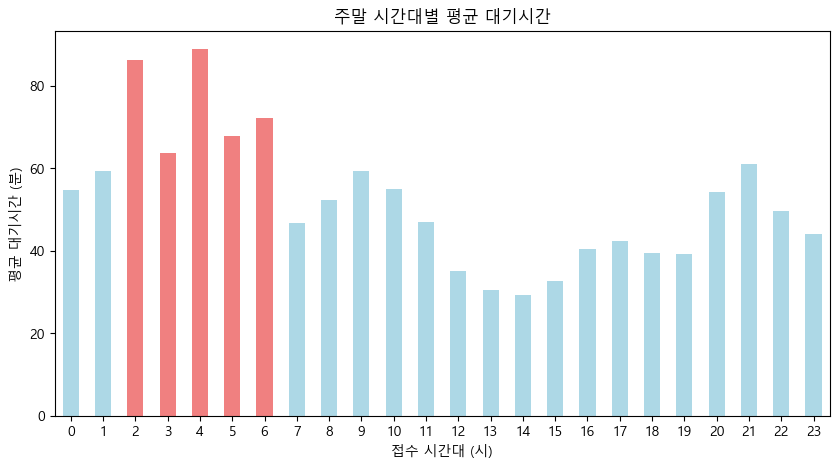

In [47]:
# 주말 데이터만 필터링
weekend_data = time_wait_avg_weekday_weekend.loc['주말']

# 주말 상위 5개 시간대 찾기
top_5_weekend = weekend_data.nlargest(5).index

# 주말 시간대별 평균 대기시간 그래프
plt.figure(figsize=(10, 5))
weekend_colors = ['lightcoral' if idx in top_5_weekend else 'lightblue' for idx in weekend_data.index]
weekend_data.plot(kind='bar', color=weekend_colors)
plt.title('주말 시간대별 평균 대기시간')
plt.xlabel('접수 시간대 (시)')
plt.ylabel('평균 대기시간 (분)')
plt.xticks(rotation=0)
plt.show()

## 11.12 시간대별 평균 대기시간(공휴일)

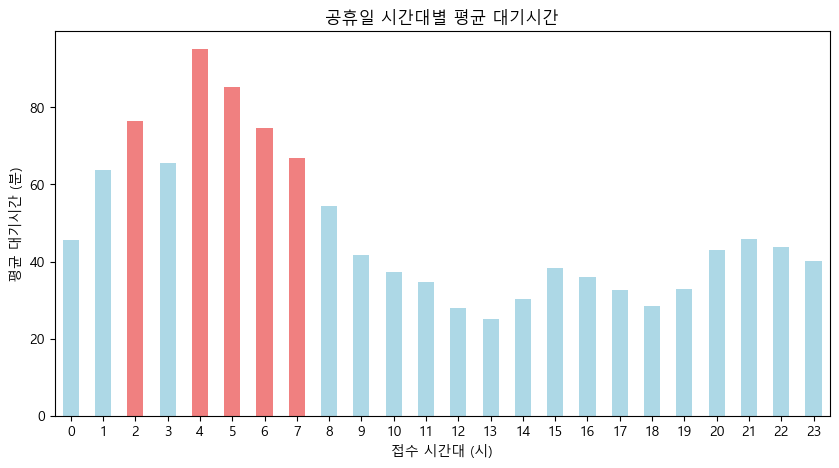

In [48]:
import matplotlib.pyplot as plt

# '공휴일' 열을 기반으로 공휴일 여부에 따라 데이터 필터링
data['공휴일여부'] = data['공휴일'].apply(lambda x: '공휴일' if x == 1 else '비공휴일')

# 시간대 및 공휴일/비공휴일별 대기시간 평균 계산
time_wait_avg_holiday = data.groupby(['공휴일여부', '접수일시_시각'])['대기시간'].mean().unstack()

# 공휴일 데이터만 필터링
holiday_data = time_wait_avg_holiday.loc['공휴일']

# 공휴일 상위 5개 시간대 찾기
top_5_holiday = holiday_data.nlargest(5).index

# 공휴일 시간대별 평균 대기시간 그래프
plt.figure(figsize=(10, 5))
holiday_colors = ['lightcoral' if idx in top_5_holiday else 'lightblue' for idx in holiday_data.index]
holiday_data.plot(kind='bar', color=holiday_colors)
plt.title('공휴일 시간대별 평균 대기시간')
plt.xlabel('접수 시간대 (시)')
plt.ylabel('평균 대기시간 (분)')
plt.xticks(rotation=0)
plt.show()## 11.11 시간대별 평균 대기시간(주말)


## 11.13 출발지구별 평균 대기시간, 목적지구별 평균 대기시간


[출발지구별 대기시간 Top5 행정구]
출발지구
서대문구    59.340980
은평구     54.662924
강동구     53.763472
강서구     53.730210
노원구     50.165833
Name: 대기시간, dtype: float64


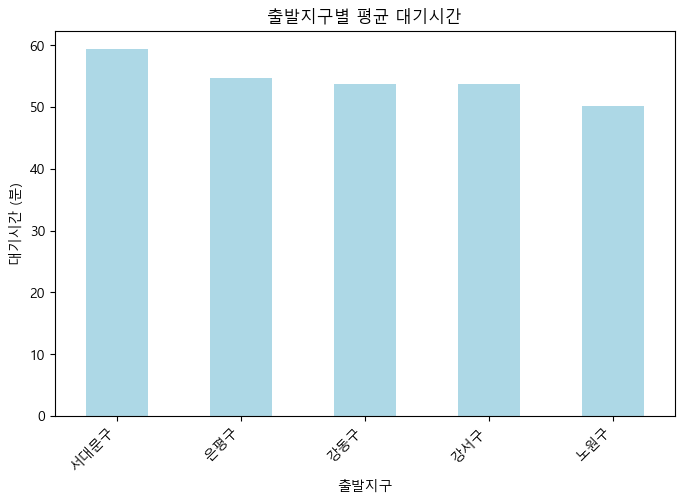


[목적지구별 대기시간 Top5 행정구]
목적지구
금천구     64.486815
마포구     61.583835
서초구     60.557684
서대문구    58.491470
중구      57.676700
Name: 대기시간, dtype: float64


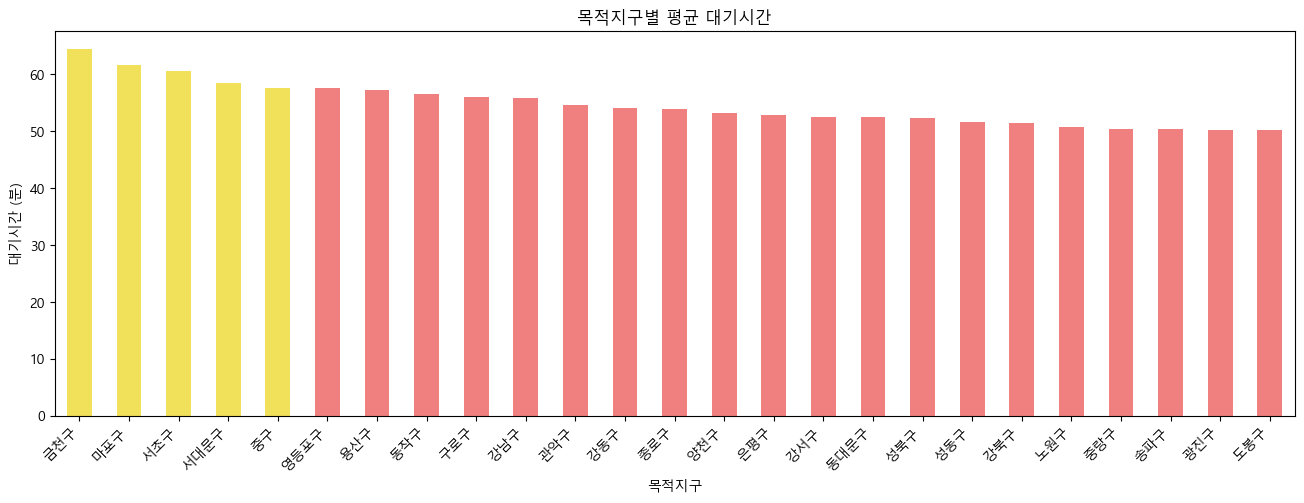

In [49]:
import matplotlib.pyplot as plt

# 출발지구별 평균 대기시간 상위 5개 행정구 계산 및 출력
departure_top5 = data.groupby('출발지구')['대기시간'].mean().nlargest(5)
print("\n[출발지구별 대기시간 Top5 행정구]")
print(departure_top5)

# 출발지구별 평균 대기시간 시각화
plt.figure(figsize=(8, 5))
departure_avg_wait = data.groupby('출발지구')['대기시간'].mean().sort_values(ascending=False)
departure_avg_wait.plot(kind='bar', color='lightblue')

# 그래프 제목 및 레이블 설정
plt.title('출발지구별 평균 대기시간')
plt.xlabel('출발지구')
plt.ylabel('대기시간 (분)')
plt.xticks(rotation=45, ha="right")
plt.show()

# 목적지구별 평균 대기시간 상위 5개 행정구 계산 및 출력
destination_top5 = data.groupby('목적지구')['대기시간'].mean().nlargest(5)
print("\n[목적지구별 대기시간 Top5 행정구]")
print(destination_top5)

# 목적지구별 평균 대기시간 시각화 (상위 5개는 노란색으로)
plt.figure(figsize=(16, 5))
destination_avg_wait = data.groupby('목적지구')['대기시간'].mean().sort_values(ascending=False)
top_5_destinations = destination_avg_wait.nlargest(5).index
colors = ['#F1E05A' if idx in top_5_destinations else 'lightcoral' for idx in destination_avg_wait.index]
destination_avg_wait.plot(kind='bar', color=colors)

# 그래프 제목 및 레이블 설정
plt.title('목적지구별 평균 대기시간')
plt.xlabel('목적지구')
plt.ylabel('대기시간 (분)')
plt.xticks(rotation=45, ha="right")
plt.show()

## 11.14 공휴일 여부에 따른 평균 대기시간 계산

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427972 entries, 0 to 427971
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   접수일시     427972 non-null  datetime64[ns]
 1   예정일시     427972 non-null  datetime64[ns]
 2   배차일시     427972 non-null  datetime64[ns]
 3   승차일시     427972 non-null  datetime64[ns]
 4   하차일시     427972 non-null  datetime64[ns]
 5   출발지구     427972 non-null  object        
 6   출발지동     427972 non-null  object        
 7   목적지구     427972 non-null  object        
 8   목적지동     427972 non-null  object        
 9   요금       427972 non-null  object        
 10  승차거리     427972 non-null  float64       
 11  유형       427972 non-null  object        
 12  대기시간     427972 non-null  float64       
 13  공휴일      427972 non-null  int64         
 14  접수일시_월   427972 non-null  int64         
 15  접수일시_요일  427972 non-null  int64         
 16  접수일시_시각  427972 non-null  int64         
 17  평일/주말    4

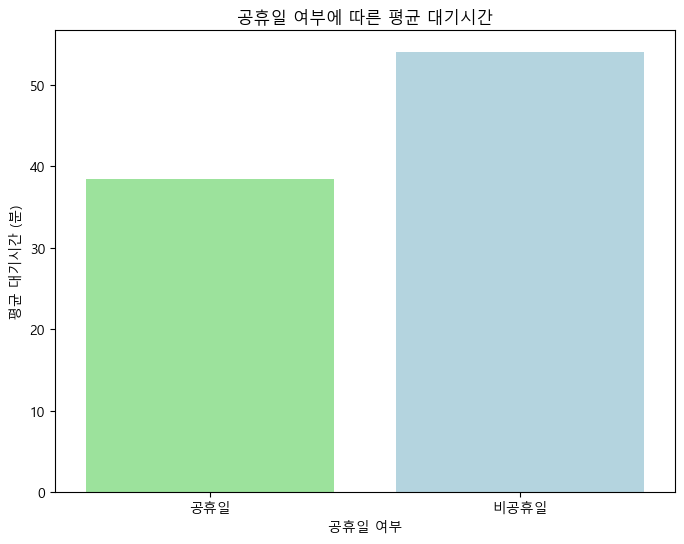

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 공휴일 여부에 따른 평균 대기시간 계산
avg_waiting_time_by_holiday = data.groupby('공휴일여부')['대기시간'].mean().reset_index()

# 색상 설정 (공휴일은 lightyellow, 비공휴일은 lightblue)
colors = ['lightgreen' if x == '공휴일' else 'lightblue' for x in avg_waiting_time_by_holiday['공휴일여부']]

# 그래프
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_waiting_time_by_holiday, x='공휴일여부', y='대기시간', palette=colors)

# 그래프 설정
plt.title('공휴일 여부에 따른 평균 대기시간')
plt.xlabel('공휴일 여부')
plt.ylabel('평균 대기시간 (분)')

plt.show()
